# Учебный проект 7_Обучение с учителем: качество модели

## Содержание

* [Описание проекта](#описание-проекта)
* [Импорт библиотек Python и загрузка данных](#импорт-библиотек-python-и-загрузка-данных)
* [Предобработка данных](#предобработка-данных)
* [Исследовательский анализ данных](#исследовательский-анализ-данных)
* [Объединение таблиц](#объединение-таблиц)
* [Корреляционный анализ данных](#объединение-данных)
* [Построение моделей классификации данных](#построение-моделей-машинного-обучения)
    * [Подготовка данных и построение пайплайна МО](#подготовка-данных-и-построение-пайплайна-мо)
    * [Выбор оптимальной модели](#выбор-оптимальной-модели)
        * [Без перебора гиперпараметров](#без-перебора-гиперпараметров)
        * [С перебором гиперпараметров](#с-перебором-гиперпараметров)
    * [Анализ важности признаков в работе модели](#анализ-важности-признаков-в-работе-модели)
    * [Сегментация пользователей](#сегментация-пользователей)
* [Общий вывод](#общий-вывод)

## Описание проекта <a class = 'anchor' id = 'Описание'></a>

На исследовании находятся данные `поведении покупателей на сайте интернет-магазина, выручке магазина с одного покупателя, времени посещения покупателями сайта интернет-магазина и таблица с данными о среднемесячной прибыли продавца за последние 3 месяца`, которые были предоставлены руководством компании "В один клик".

---

`Задача`

**Разработать модели машинного обучения для персонализации предложений постоянным клиентам магазина**:

---

`Путь решения`

1. Промаркировать уровень финансовой активности постоянных покупателей: `снизилась` - если клиент стал покупать меньше товаров; `прежний уровень`;
2. Собрать данные по клиентам по следующим группам:
    * Признаки, которые описывают коммуникацию сотрудников компании с клиентом;
    * Признаки, которые описывают продуктовое поведение покупателя;
    * Признаки, которые описывают покупательское поведение клиента;
    * Признаки, которые описывают поведение покупателя на сайте.
3. Построить модель, которая `предскажет вероятность снижения покупательской активности клиента в следующие 3 месяца`;
4. Провести исследование прибыльности клиента - `какой доход каждый покупатель приносил компании за последние 3 месяца`;
5. Выделить сегменты покупателей и разработать для них персонализированные предложения.

---

`Располагаемые данные`

**Поведение покупателя на сайте - market_file**

* id - номер покупателя в корпоративной базе данных;
* Покупательская активность — рассчитанный класс покупательской активности (целевой признак): `снизилась` или `прежний уровень`;
* Тип сервиса — уровень сервиса, например `премиум` и `стандарт`;
* Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель;
* Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента;
* Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце;
* Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте;
* Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев;
* Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев;
* Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца;
* Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца;
* Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта;
* Страниц_за_визит - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

**Данные о выручке с покупателя - market_money**

* id — номер покупателя в корпоративной базе данных;
* Период — название периода, во время которого зафиксирована выручка. Например, `текущий_месяц` или `предыдущий_месяц`;
* Выручка - сумма выручки за период.

**Данные о времени, которое покупатель провел на сайте - market_time**

* id — номер покупателя в корпоративной базе данных;
* Период — название периода, во время которого зафиксировано общее время;
* минут — значение времени, проведённого на сайте, в минутах.

**Данные о среднемесячной прибыли продавца за последние 3 месяца - money**

* id - номер покупателя в корпоративной базе данных;
* Прибыль - значение прибыли.

## Импорт библиотек Python и загрузка данных <a class = 'anchor' id = 'Импорт'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Импорт библиотек Python:
    * для манипулирования данными;
    * для визуализации данных;
    * для решения задач машинного обучения.
2. Загрузка данных в рабочую среду Jupyter Notebook. Инициализация переменных в соответствие с названиями загружаемых датасетов:
    * **market_file**;
    * **market_money**;
    * **market_time**;
    * **money**;
3. Вывод на экран параметров датасетов:
    * вывод общей структуры набора данных - демонстрация первых 5 строк;
    * общей информации о наборе данных;
    * визуализация распределения количественных показателей.
4. Формирование вывода по итогам данного этапа.

In [1]:
!pip install shap -q

In [2]:
!pip install --upgrade scikit-learn

In [3]:
# импорт библиотек python

# для манипулирования данными
import pandas as pd
import numpy as np

# для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
# установка размеров для последующих графиков в проекте
plt.rcParams['figure.figsize'] = (10, 5)


# модели классификации
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# метрики оценки эффективности моделей
from sklearn.metrics import (recall_score,
                             precision_score,
                             confusion_matrix,
                             fbeta_score,
                             roc_auc_score)

# механизмы отбора данных и подбора параметров моделей
from sklearn.model_selection import train_test_split, GridSearchCV

# механизмы подготовки данных
from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   OneHotEncoder,
                                   OrdinalEncoder,
                                   LabelEncoder)

# механизмы построения пайплайнов
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# механизм заполнения пустых значений
from sklearn.impute import SimpleImputer

# механизм анализха влияния признаков
import shap

In [4]:
# инициализация констант для дальнейшего использования в проекте
# инициализация переменной RANDOM_STATE для фиксирования "случайности" и TEST_SIZE для фиксирования размера тестовой выборки
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [5]:
# загрузка данных в рабочую среду
try:
    market_file = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/market_file.csv', sep = ',') # поведение покупателя на сайте
    market_money = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/market_money.csv', sep = ',') # выручка с покупателя
    market_time = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/market_time.csv', sep = ',') # время, проведенное покупателем на сайте
    money = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/money.csv', sep = ';') # среднемесячная прибыль продавца за последние 3 месяца
except:
    market_file = pd.read_csv('/datasets/market_file.csv', sep = ',')
    market_money = pd.read_csv('/datasets/market_money.csv', sep = ',')
    market_time = pd.read_csv('/datasets/market_time.csv', sep = ',')
    money = pd.read_csv('/datasets/money.csv', sep = ';')

In [6]:
# инициализация пользовательской функции для первичного изучения содержимого наборов данных
def  first_meeting (df : pd.DataFrame, df_name : str) -> None:
    print(f'Структура набора данных {df_name}')
    display(df.head())
    print('Общая информация о наборе')
    print(df.info())
    print()

In [7]:
# инициализация пользовательской функции построения распределений количественных непрерывных показателей
def num_distribution(df : pd.DataFrame, column : str, bins : int):
    plt.subplot(1, 2, 1)
    plt.xlabel(f'Значения признака {column}')
    plt.ylabel(f'Частота значений признака')
    plt.title(f'Гистограмма значений {column}', fontsize = 10)
    sns.histplot(data = df, x = df[column], bins = bins)
    plt.subplot(1, 2, 2)
    plt.xlabel(f'Значения признака {column}')
    plt.title(f'Диаграмма размаха значений {column}', fontsize = 10)
    sns.boxplot(data = df, x = df[column])
    plt.grid(False)
    plt.show()

In [8]:
# инициализация пользовательской функции построения диаграмм количественных дискретных показателей
def num_countplot(df : pd.DataFrame, column : str):
    sns.countplot(data = df, x = df[column])
    plt.title(f'Столбчатая диаграмма значений признака {column}', fontsize = 12)
    plt.xlabel(f'Признак {column}')
    plt.ylabel(f'Количество значений признака')
    plt.show()

Структура набора данных market_file


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


Общая информация о наборе
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошиб

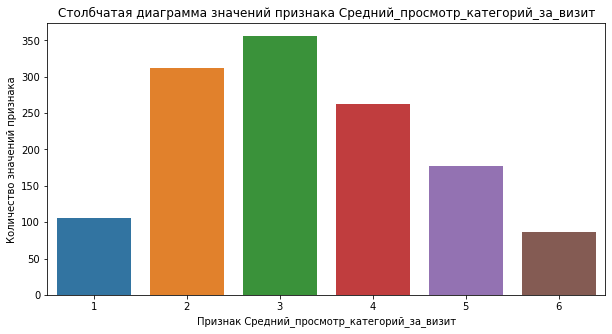

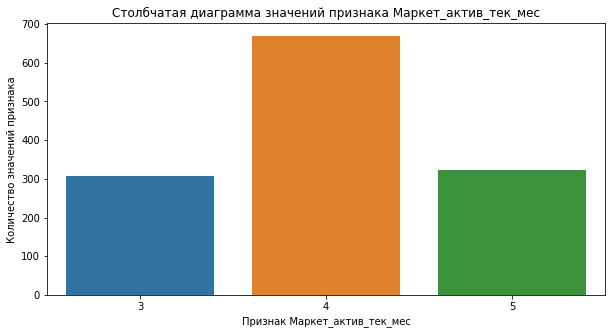

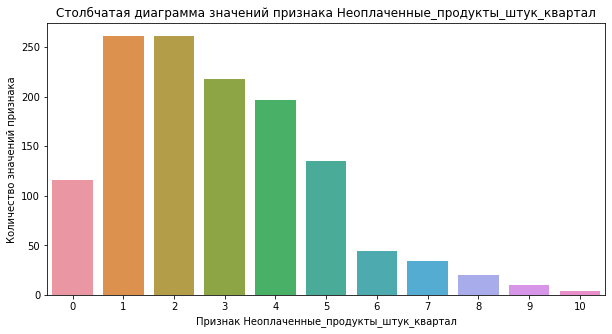

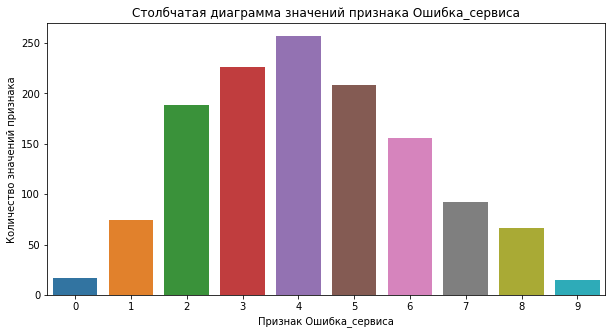

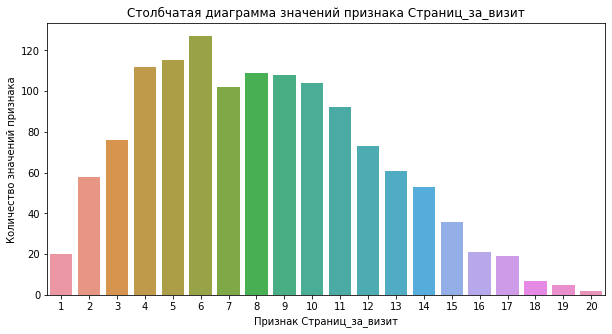

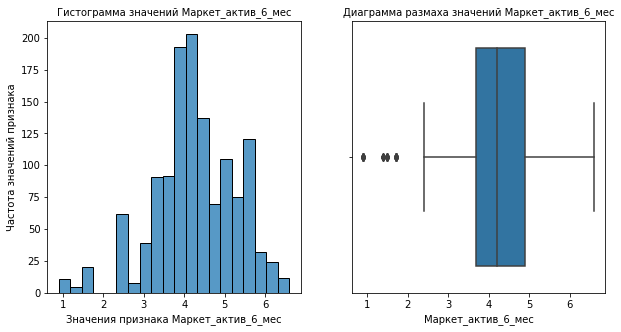

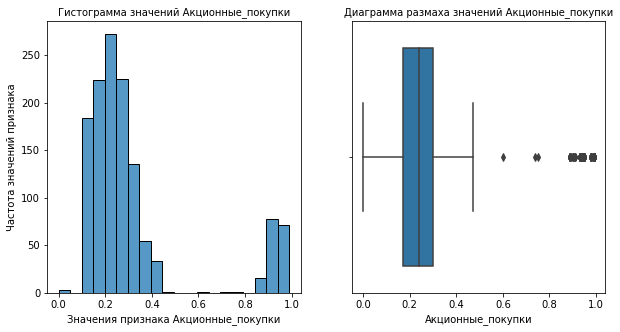

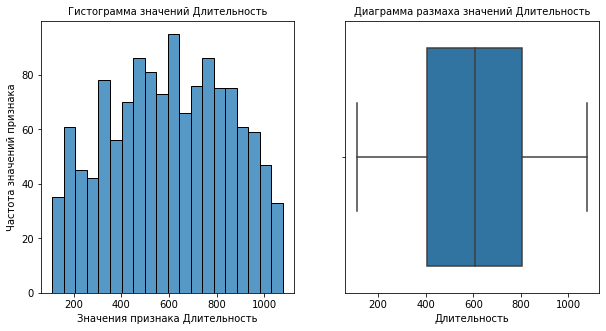

In [9]:
# вывод на экран параметров датасета 'market_file'
first_meeting(market_file, 'market_file')

# вывод на экран графиков дискретных количественных величин по набору 'market_file'
for col in ['Средний_просмотр_категорий_за_визит', 'Маркет_актив_тек_мес', 'Неоплаченные_продукты_штук_квартал',
            'Ошибка_сервиса', 'Страниц_за_визит']:
    num_countplot(market_file, col)

# вывод на экран графиков непрерывных количественных величин по набору 'market_file'
for col in ['Маркет_актив_6_мес', 'Акционные_покупки', 'Длительность']:
    num_distribution(market_file, col, 20)

Структура набора данных market_money


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


Общая информация о наборе
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
None



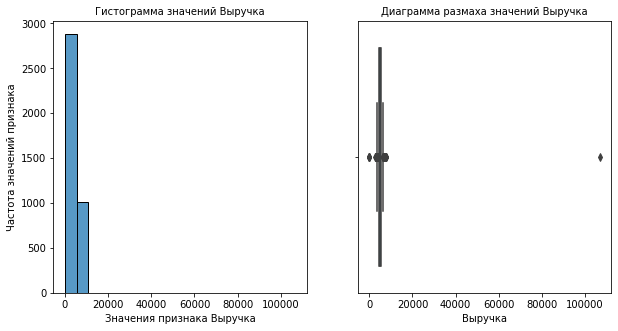

In [10]:
# вывод на экран параметров датасета 'market_money'
first_meeting(market_money, 'market_money')

# вывод на экран графиков непрерывных количественных величин по набору 'market_money'
num_distribution(market_money, 'Выручка', 20)

Структура набора данных market_time


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


Общая информация о наборе
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
None



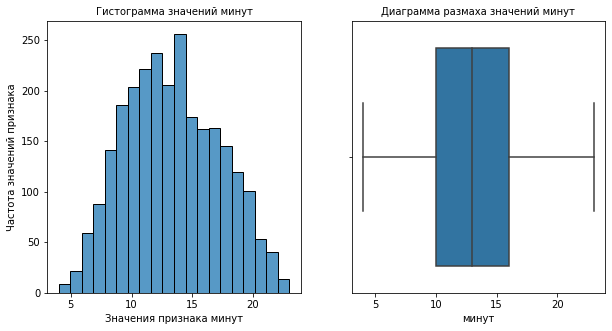

In [11]:
# вывод на экран параметров датасета 'market_time'
first_meeting(market_time, 'market_time')

# вывод на экран графиков непрерывных количественных величин по набору 'market_time'
num_distribution(market_time, 'минут', 20)

Структура набора данных money


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Общая информация о наборе
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB
None



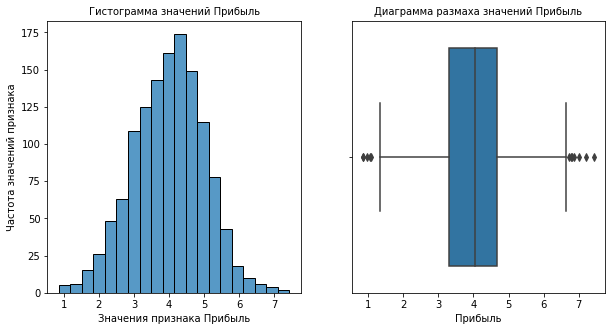

In [12]:
# преобразование типа данных в столбце 'Прибыль'
money['Прибыль'] = pd.to_numeric(money['Прибыль'].str.replace(',', '.'))

# вывод на экран параметров датасета 'money'
first_meeting(money, 'money')

# вывод на экран графиков непрерывных количественных величин по набору 'money'
num_distribution(money, 'Прибыль', 20)

**Вывод**

1. Импортированы библиотеки Python:
    * для манипулирования данными:
        * pandas;
        * numpy.
    * для визуализации данных:
        * matplotlib.pyplot;
        * seaborn.
    * для решения задач машинного обучения:
        * LogisticRegression - модель логистической регрессии;
        * KNeighborsClassifier - модель k-ближайших соседей;
        * SVC - машина опорных векторов;
        * DecisionTreeClassifier - модель дерева принятия решений;
        * метрики оценки эффективности моделей классификации;
        * train_test_split - механизм разделения данных;
        * GridSearchCV - механизм поиска гиперпараметров с перебором по "сетке";
        * StandardScaler - стандартизация данных;
        * MinMaxScaler - нормализация данных;
        * OneHotEncoder - one-hot кодирование категориальных признаков;
        * LabelEncoder - кодирование значений целевой переменной;
        * Pipeline - механизм построения пайплайнов;
        * ColumnTransformer - механизм объединения шагов пайплайна;
        * SimpleImputer - механизм заполнения пустых значений;
        * SHAP - механизм анализа важности признаков.
2. Произведена загрузка данных в рабочую среду Jupyter Notebook. Инициализированы переменные в соответствие с названиями загружаемых датасетов:
    * `market_file`;
    * `market_money`;
    * `market_time`;
    * `money`;
3. Выведены на экран параметры датасетов:
    * `market_file`
        * В наборе данных **отсутствуют пустые значения**;
        * Типы данных соответствуют сущностям значений, приведенным в столбцах;
        * Наблюдаются неверные написания значений категориальных признаков (на примере **"стандартт"** в столбце **Тип сервиса**). Требуется проверка набора данных на неявные дубликаты.
    * `market_money`
        * В наборе данных **отсутствуют пустые значения**;
        * Типы данных соответствуют сущностям значений, приведенным в столбцах.
    * `market_time`
        * В наборе данных **отсутствуют пустые значения**;
        * Типы данных соответствуют сущностям значений, приведенным в столбцах;
        * Наблюдаются неверные написания значений категориальных признаков (на примере **"предыдцщий_месяц"** в столбце **Период**). Требуется проверка набора данных на неявные дубликаты.
    * `money`
        * Произведена обработка числовых значений в столбце **Прибыль** - изменено форматирование дробной части. Тип данных - float;
        * В наборе данных **отсутствуют пустые значения**.

## Предобработка данных <a class = 'anchor' id = 'Предобработка'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Замена названий столбцов - для упрощения навигации по датасету и улучшения читабельности данных:
    * Перевод названий столбцов на английский язык;
    * Приведение столбцов к формату snake_case.
2. Проверка датасетов на дубликаты:
    * Явные дубликаты;
    * Неявные дубликаты.
3. Формирование вывода по итогам данного этапа.

In [13]:
# замена названий столбцов в датасете 'market_file'
market_file = market_file.rename(columns={
    'id' : 'user_id',
    'Покупательская активность' : 'buyer_activity',
    'Тип сервиса' : 'service_type',
    'Разрешить сообщать' : 'allow_notifications',
    'Маркет_актив_6_мес' : 'market_activity_6_months',
    'Маркет_актив_тек_мес' : 'market_activity_current_month',
    'Длительность' : 'duration',
    'Акционные_покупки' : 'discount_purchases',
    'Популярная_категория' : 'popular_category',
    'Средний_просмотр_категорий_за_визит' : 'average_category_views',
    'Неоплаченные_продукты_штук_квартал' : 'unpaid_products',
    'Ошибка_сервиса' : 'service_error',
    'Страниц_за_визит' : 'pages_per_visit'
})

# замена названий столбцов в датасете 'market_money'
market_money = market_money.rename(columns = {
    'id' : 'user_id',
    'Период' : 'period',
    'Выручка' : 'revenue'
})

# замена названий столбцов в датасете 'market_time'
market_time = market_time.rename(columns = {
    'id' : 'user_id',
    'Период' : 'period',
    'минут' : 'minutes'
})

# замена названий столбцов в датасете 'money'
money = money.rename(columns = {
    'id' : 'user_id',
    'Прибыль' : 'profit'
})

In [14]:
# инициализация пользовательской функции проверки уникальных значений по столбцам датасета
def unique_values(df : pd.DataFrame):
    df = df.select_dtypes(exclude = 'number')
    for column in df.columns:
        print(f'Столбец {column}: {list(df[column].unique())}')

In [15]:
# проверка набора 'market_file' на уникальные значения
print('Уникальные значения по категориальным столбцам market_file')
unique_values(market_file)

Уникальные значения по категориальным столбцам market_file
Столбец buyer_activity: ['Снизилась', 'Прежний уровень']
Столбец service_type: ['премиум', 'стандартт', 'стандарт']
Столбец allow_notifications: ['да', 'нет']
Столбец popular_category: ['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары', 'Техника для красоты и здоровья', 'Кухонная посуда', 'Мелкая бытовая техника и электроника']


In [16]:
# проверка набора 'market_money' на уникальные значения
print('Уникальные значения по категориальным столбцам market_money')
unique_values(market_money)

Уникальные значения по категориальным столбцам market_money
Столбец period: ['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц']


In [17]:
# проверка набора 'market_time' на уникальные значения
print('Уникальные значения по категориальным столбцам market_time')
unique_values(market_time)

Уникальные значения по категориальным столбцам market_time
Столбец period: ['текущий_месяц', 'предыдцщий_месяц']


In [18]:
# понижение регистра значений в категориальных признаках в каждом из наборов данных
for data in [market_file, market_money, market_time]:
    cols = list(data.select_dtypes(exclude='number').columns)
    data[cols] = data[cols].apply(lambda x: x.str.lower())

In [19]:
# инициализация пользовательской функции по замене значений в категориальных столбцах
def replace_values(df : pd.DataFrame, column : str, old_value : str, new_value : str):
    df.loc[df[column] == old_value, column] = new_value

In [20]:
# замена значений в датасетах
replace_values(market_file, 'service_type', 'стандартт', 'стандарт')
replace_values(market_file, 'popular_category', 'Косметика и аксесуары', 'Косметика и аксессуары')
replace_values(market_time, 'period', 'предыдцщий_месяц', 'предыдущий_месяц')

In [21]:
# инициализация переменных 'data_names_list' и 'data_list' для хранения списка названий наборов данных и самих наборов данных
data_names_list = ['market_file', 'market_money', 'market_time', 'money']
data_list = [market_file, market_money, market_time, money]

In [22]:
# проверка на наличие явных дубликатов
counter = 0

print('Проверка на наличие явных дубликатов')
for df in data_list:
    print(f'Число явных дубликатов в {data_names_list[counter]}: {df.duplicated().sum()}')
    counter += 1

Проверка на наличие явных дубликатов
Число явных дубликатов в market_file: 0
Число явных дубликатов в market_money: 0
Число явных дубликатов в market_time: 0
Число явных дубликатов в money: 0


In [23]:
# дополнительная проверка набора данных 'market_file' на наличие дубликатов
print('Число явных дубликатов в market_file: ',
      market_file.duplicated(subset = ['user_id', 'service_type', 'allow_notifications', 'popular_category']).sum())

Число явных дубликатов в market_file:  0


**Вывод**

1. Выполнена замена названий столбцов в датасетах:
    * Названия переведены на английский язык;
    * Названия приведены к формату snake_case.
2. Выполнена проверка наборов данных на дубликаты:
    * **Явные дубликаты** - явные дубликаты **не обнаружены**; 
    * Неявные дубликаты:
        * Столбец **service_type** в наборе `market_file` - преобразованы значения "стандартт" на "стандарт";
        * Столбец **period** в наборе `market_time` - преобразованы значения "предыдцщий_месяц" на "предыдущий_месяц";
3. Данные прошли этап предобработки и готовы к исследовательскому анализу.

## Исследовательский анализ данных <a class = 'anchor' id = 'Исследование'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Вывод на экран основной статистической информации по текущим версиям наборов данных;
2. Исследование соотношения количества значений качественных показателей;
3. Исследование распределения количественных показателей наборов. Построение **гистограмм распределения значений**;
4. Фильтрация наборов данных - **отбор клиентов с покупательской активностью не менее 3 месяцев**. Исключение аномально больших / малых значений из наборов данных;
5. Формирование вывода по итогам этапа.

In [24]:
# вывод на экран основных статистик по наборам данных
counter = 0

for df in data_list:
    print(f'Основная статистическая информация по набору {data_names_list[counter]}')
    display(df.iloc[:, 1:].describe().T)
    counter += 1
    print()

Основная статистическая информация по набору market_file


,count,mean,std,min,25%,50%,75%,max
market_activity_6_months,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.9,6.60
market_activity_current_month,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.0,5.00
duration,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.0,1079.00
discount_purchases,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.3,0.99
average_category_views,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.0,6.00
unpaid_products,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.0,10.00
service_error,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.0,9.00
pages_per_visit,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.0,20.00



Основная статистическая информация по набору market_money


,count,mean,std,min,25%,50%,75%,max
revenue,3900.0,5025.696051,1777.704104,0.0,4590.15,4957.5,5363.0,106862.2



Основная статистическая информация по набору market_time


,count,mean,std,min,25%,50%,75%,max
minutes,2600.0,13.336154,4.080198,4.0,10.0,13.0,16.0,23.0



Основная статистическая информация по набору money


,count,mean,std,min,25%,50%,75%,max
profit,1300.0,3.996631,1.013722,0.86,3.3,4.045,4.67,7.43


**Вывод по промежуточному этапу**:

Набор `market_file` характеризуется следующими статистическими показателями:

* **market_activity_6_months - среднемесячное значение маркетинговых коммуникаций на пользователя**:
    * Среднее значение - 4.3;
    * Минимальное значение - 0.9;
    * Максимальное значение - 6.6;
    * Стандартное отклонение - 1.1.
* **market_activity_current_month - количество маркетинговых коммуникаций в текущем месяце**:
    * Среднее значение - 4.0;
    * Минимальное значение - 3.0;
    * Максимальное значение - 5.0;
    * Стандартное отклонение - 0.7. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
* **duration - сколько времени прошло с момента регистрации пользователя на сайте**:
    * Среднее значение - 601.9;
    * Минимальное значение - 110;
    * Максимальное значение - 1 079;
    * Стандартное отклонение - 249,9. Ряд данных достаточно вариативен, но **явных выбросов пока не обнаружено**. Потребуется проверка на следующих шагах.
* **discount_purchases - среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев**:
    * Среднее значение - 0.32;
    * Минимальное значение - 0.0;
    * Максимальное значение - 0.99;
    * Стандартное отклонение - 0.25. Заметно значение в 99% совершенных покупок по акции - скорее всего пользователь совершает покупки исключительно акционных товаров.
* **average_category_views - показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца**:
    * Среднее значение - 3.3;
    * Минимальное значение - 1.0;
    * Максимальное значение - 6.0;
    * Стандартное отклонение - 1.4. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
* **unpaid_products - общее число неоплаченных товаров в корзине за последние 3 месяца**:
    * Среднее значение - 2.8;
    * Минимальное значение - 0.0;
    * Максимальное значение - 10.0;
    * Стандартное отклонение - 2.0. Заметно большое максимальное значение в 10 неоплаченных единиц - вероятно, что это есть уникальный пользователь, который добавил в корзину большое значение товаров с целью последующей будущей покупки (корзина выполняет роль "Избранное").
* **service_error - число сбоев, которые коснулись покупателя во время посещения сайта**:
    * Среднее значение - 4.2;
    * Минимальное значение - 0.0;
    * Максимальное значение - 9.0;
    * Стандартное отклонение - 2.0. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
* **pages_per_visit - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца**:
    * Среднее значение - 8.2;
    * Минимальное значение - 1.0;
    * Максимальное значение - 20.0;
    * Стандартное отклонение - 4.0. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.

Набор `market_money` характеризуется следующими статистическими показателями:

* **revenue - сумма выручки за период**:
    * Среднее значение - 5 025.7;
    * Минимальное значение - 0.0;
    * Максимальное значение - 106 862.2;
    * Стандартное отклонение - 1 777.7. Обнаружена аномально большая сумма выручки. Потребуется проверка на следующих шагах и устранение аномалий.

Набор `market_time` характеризуется следующими статистическими показателями:

* **minutes - время, проведенное на сайте, в минутах**:
    * Среднее значение - 13.3;
    * Минимальное значение - 4.0;
    * Максимальное значение - 23.0;
    * Стандартное отклонение - 4.0. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.

Набор `money` характеризуется следующими статистическими показателями:

* **profit - значение прибыли**:
    * Среднее значение - 4.0;
    * Минимальное значение - 0.86;
    * Максимальное значение - 7.43;
    * Стандартное отклонение - 1.0. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.

In [25]:
# инициализация пользовательской функции по формированию вывода информации

def display_info(df: pd.DataFrame, column_name: str, title: str, xlabel: str, kind_of_plot : str):
# построение визуализации по выбранной метрике
    plt.title(title, fontsize = 12)
    if kind_of_plot == 'pie':
        (df[column_name]
         .value_counts()
         .sort_values(ascending=True)
         .plot(kind = kind_of_plot, figsize = (8, 5), autopct='%1.0f%%'))
    else:
        (df[column_name]
         .value_counts()
         .sort_values(ascending=True)
         .plot(kind = kind_of_plot, figsize = (8, 5)))
    ax = plt.gca()
    ax.axes.yaxis.set_visible(False)
    plt.xlabel(xlabel)
    plt.show()

# построение сводной таблицы по выбранной метрике
    pivot_data = (df[column_name]
                  .value_counts()
                  .sort_values(ascending=False)
                  .to_frame())
    pivot_data['share_of_users'] = round(pivot_data[column_name] / pivot_data[column_name].sum() * 100, 2)
    pivot_data.columns = ['count_of_users', 'share_of_users']
    display(pivot_data)

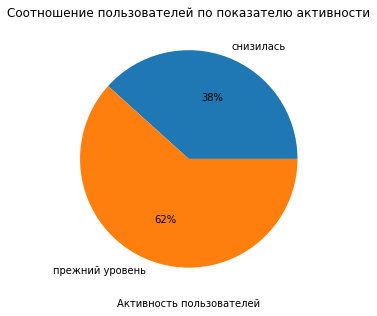

,count_of_users,share_of_users
прежний уровень,802,61.69
снизилась,498,38.31


In [26]:
display_info(market_file, 'buyer_activity', 'Соотношение пользователей по показателю активности', 'Активность пользователей', 'pie')

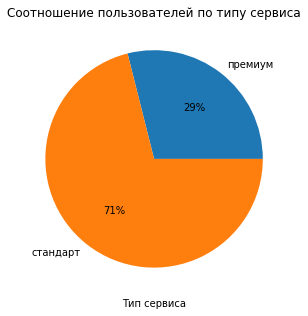

,count_of_users,share_of_users
стандарт,924,71.08
премиум,376,28.92


In [27]:
display_info(market_file, 'service_type', 'Соотношение пользователей по типу сервиса', 'Тип сервиса', 'pie')

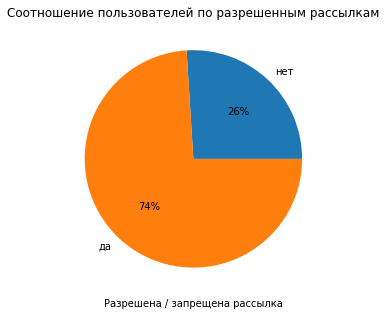

,count_of_users,share_of_users
да,962,74.0
нет,338,26.0


In [28]:
display_info(market_file, 'allow_notifications', 'Соотношение пользователей по разрешенным рассылкам', 'Разрешена / запрещена рассылка', 'pie')

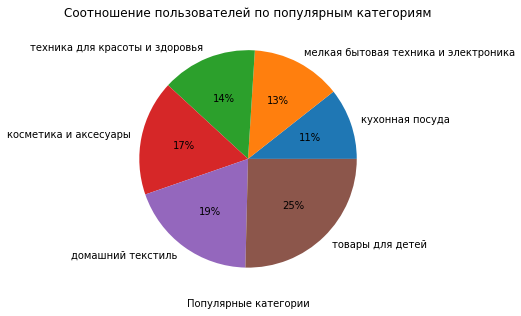

,count_of_users,share_of_users
товары для детей,330,25.38
домашний текстиль,251,19.31
косметика и аксесуары,223,17.15
техника для красоты и здоровья,184,14.15
мелкая бытовая техника и электроника,174,13.38
кухонная посуда,138,10.62


In [29]:
display_info(market_file, 'popular_category', 'Соотношение пользователей по популярным категориям', 'Популярные категории', 'pie')

**Вывод по промежуточному этапу**

* Значения по признаку **buyer_activity** соотнесены не в равных пропорциях: 802 (62%) - 498 (32%);
* Значения по признаку **service_type** соотнесены не в равных пропорциях: 924 (71%) - 376 (29%);
* Значения по признаку **allow_notifications** соотнесены не в равных пропорциях: 962 (74%) - 338 (26%);
* Значения по признаку **popular_category** распределены более равномерно, чем значения по остальным показателям. Диапазон варьируется от 138 до 330.

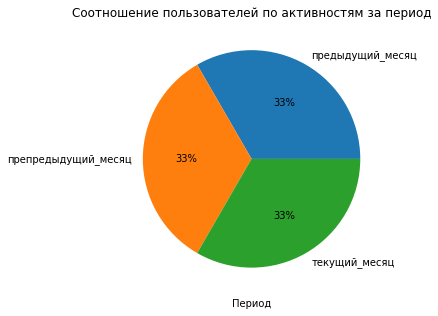

,count_of_users,share_of_users
предыдущий_месяц,1300,33.33
препредыдущий_месяц,1300,33.33
текущий_месяц,1300,33.33


In [30]:
display_info(market_money, 'period', 'Соотношение пользователей по активностям за период', 'Период', 'pie')

**Вывод по промежуточному этапу**

* Значения по признаку **period** соотнесены в равных пропорциях: 1 300 (33%) - 1 300 (33%) - 1 300 (33%);

На последующем этапе подготовки данных для машинного обучения "выравнивание" не потребуется.

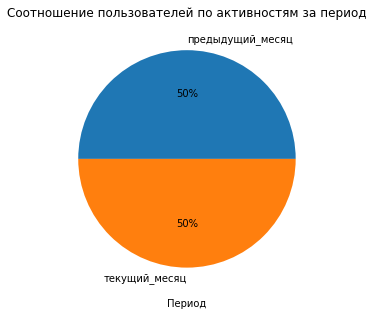

,count_of_users,share_of_users
предыдущий_месяц,1300,50.0
текущий_месяц,1300,50.0


In [31]:
display_info(market_time, 'period', 'Соотношение пользователей по активностям за период', 'Период', 'pie')

**Вывод по промежуточному этапу**

* Значения по признаку **period** соотнесены в равных пропорциях: 1 300 (50%) - 1 300 (50%);

Последующего "выравнивания" не потребуется.

In [32]:
# инициализация пользовательской функции по построению гистограмм по передаваемым метрикам
def histogram_plotting(data: pd.DataFrame, feature : str, bins: int, x_size: int, y_size: int, feature_xlabel : str):
    # вычисление статистических метрик для дальнейшей визуализации
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    upper_bound = q3 + 1.5 * (q3 - q1)
    lower_bound = q1 - 1.5 * (q3 - q1)

    # построение визуализации
    plt.figure(figsize = (x_size, y_size))
    plt.hist(data[feature], color = 'blue', edgecolor = 'white', bins = bins)
    plt.axvline(upper_bound, c = 'red', ls = '-', label = 'верхняя граница допустимых значений')
    plt.axvline(q3, c = 'red', ls = '--', label = '3 квартиль значений')
    plt.axvline(q1, c = 'black', ls = '--', label = '1 квартиль значений')
    plt.axvline(lower_bound, c = 'black', ls = '-', label = 'нижняя граница допустимых значений')
    plt.title(f'Гистограмма распределения значений по метрике: {feature_xlabel}', fontsize = 10)
    plt.xlabel(feature_xlabel)
    plt.ylabel('Количество значений по метрике')
    plt.legend(bbox_to_anchor = (1, 0.6))
    plt.show()

    # вывод статистических метрик на экран
    print('Верхняя допустимая граница значений:', upper_bound)
    print('Нижняя допустимая граница значений:', lower_bound)
    print('Медианное значение:', data[feature].median())
    print('Среднее значение:', round(data[feature].mean(), 2))

    # расчет доли аномальных значений по метрике
    print('Доля значений, выходящих за верхнюю границу: {:.2%}'.format(data[data[feature] > upper_bound].shape[0] / data[feature].shape[0]))
    print('Доля значений, выходящих за нижнюю границу: {:.2%}'.format(data[data[feature] < lower_bound].shape[0] / data[feature].shape[0]))

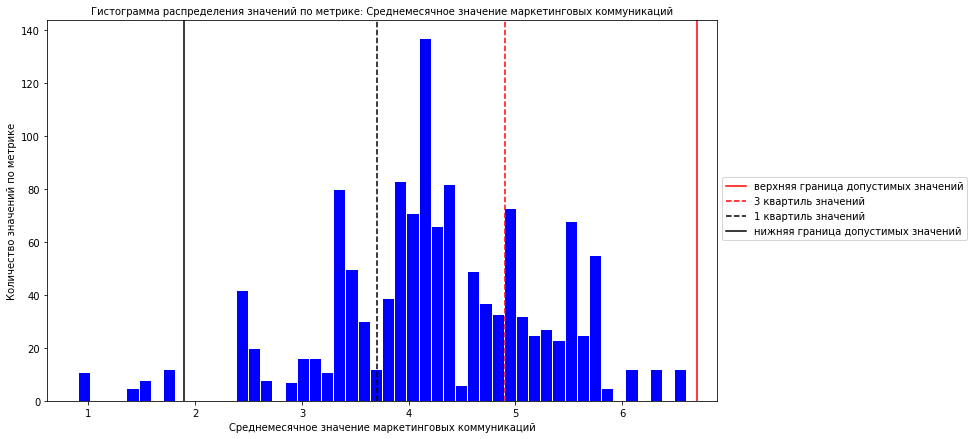

Верхняя допустимая граница значений: 6.700000000000001
Нижняя допустимая граница значений: 1.9
Медианное значение: 4.2
Среднее значение: 4.25
Доля значений, выходящих за верхнюю границу: 0.00%
Доля значений, выходящих за нижнюю границу: 2.77%


In [33]:
histogram_plotting(market_file, 'market_activity_6_months', 50, 12, 7, 'Среднемесячное значение маркетинговых коммуникаций')

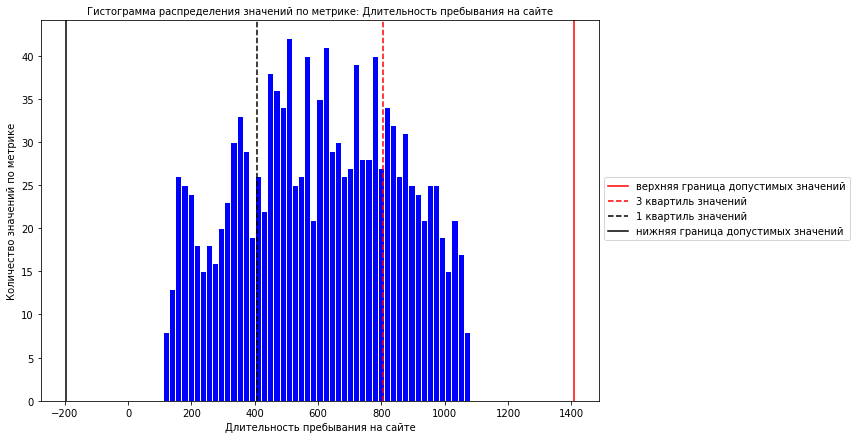

Верхняя допустимая граница значений: 1406.75
Нижняя допустимая граница значений: -195.25
Медианное значение: 606.0
Среднее значение: 601.9
Доля значений, выходящих за верхнюю границу: 0.00%
Доля значений, выходящих за нижнюю границу: 0.00%


In [34]:
histogram_plotting(market_file, 'duration', 50, 10, 7, 'Длительность пребывания на сайте')  

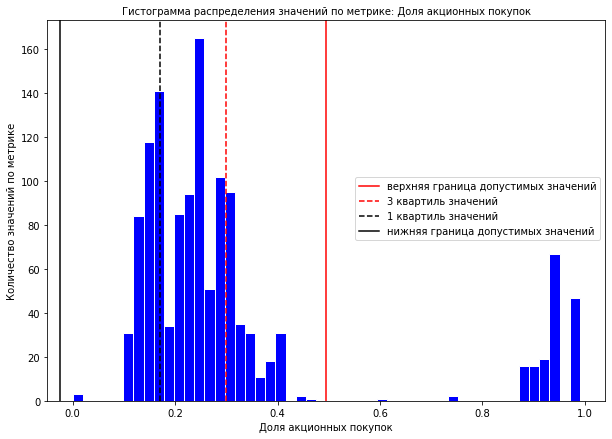

Верхняя допустимая граница значений: 0.49499999999999994
Нижняя допустимая граница значений: -0.02499999999999994
Медианное значение: 0.24
Среднее значение: 0.32
Доля значений, выходящих за верхнюю границу: 12.92%
Доля значений, выходящих за нижнюю границу: 0.00%


In [35]:
histogram_plotting(market_file, 'discount_purchases', 50, 10, 7, 'Доля акционных покупок')  

**Вывод по промежуточному этапу:**

* **market_activity_6_months** - среднемесячное значение маркетинговых коммуникаций
    * Распределение имеет вид **нормального**. Значения группируются около среднего **4.25** и медианы **4.2**;
    * Заметны как несколько объектов с большим количеством маркетинговых коммуникаций (>6), так и объекты с минимальным количеством коммуникаций (<2).
* **duration** - длительность пребывания на сайте
    * Распределение имеет вид **нормального**. Значения группируются около среднего **601.9** и медианы **606**;
    * Аномально малых и высоких значений длительности посещения **не обнаружено**.
* **discount_purchases** - доля акционных покупок
    * Заметно разделение пользователей на группы: основная масса покупателей и покупателей, совершающих покупки при наличии скидки;
    * Заметны так же отдельные объекты, поведение которых нельзя отнести ни к одной, ни к другой группам.

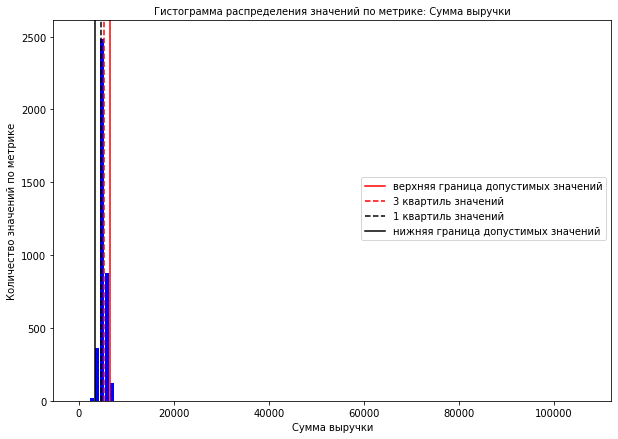

Верхняя допустимая граница значений: 6522.275000000001
Нижняя допустимая граница значений: 3430.874999999999
Медианное значение: 4957.5
Среднее значение: 5025.7
Доля значений, выходящих за верхнюю границу: 2.77%
Доля значений, выходящих за нижнюю границу: 1.72%


In [36]:
histogram_plotting(market_money, 'revenue', 100, 10, 7, 'Сумма выручки')

**Вывод по промежуточному этапу:**
* **revenue** - сумма выручки
    * Распределение имеет вид **отличного от нормального**. Значения группируются около медианы **4 600**. Среднее значение - **5 025**;
    * Замечено наличие аномально высоких значений - пользователи с суммой выручки более 100 000.
    * На этапе подготовки данных к машинному обучению потребуется произвести **нормирование данных**.

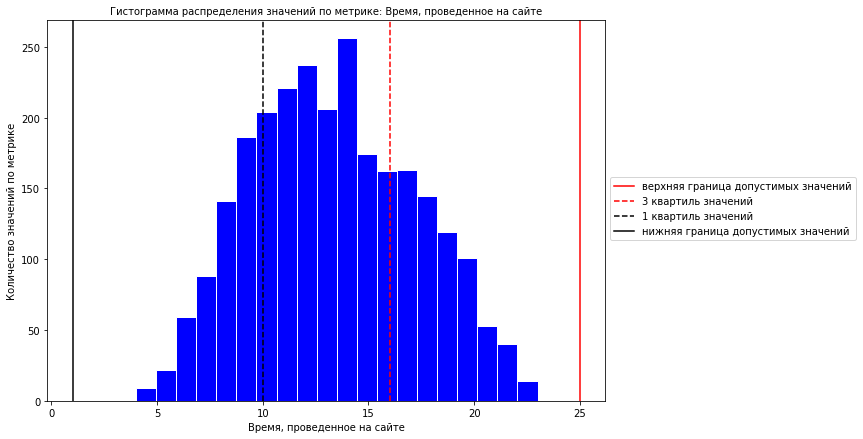

Верхняя допустимая граница значений: 25.0
Нижняя допустимая граница значений: 1.0
Медианное значение: 13.0
Среднее значение: 13.34
Доля значений, выходящих за верхнюю границу: 0.00%
Доля значений, выходящих за нижнюю границу: 0.00%


In [37]:
histogram_plotting(market_time, 'minutes', 20, 10, 7, 'Время, проведенное на сайте')

**Вывод по промежуточному этапу:**
* **minutes** - время, проведенное на сайте, в минутах
    * Распределение имеет вид **близкого к нормальному**. Значения группируются около медианы **13**. Среднее значение - **13.3**;
    * Аномально высоких или малых значений **не обнаружено**.

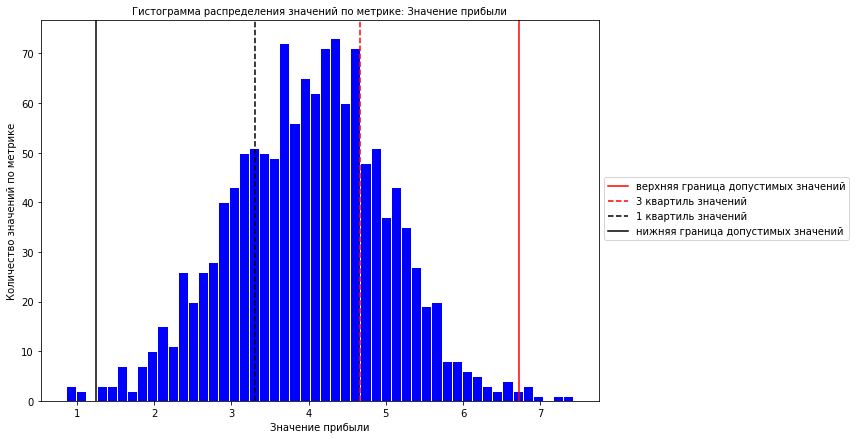

Верхняя допустимая граница значений: 6.725
Нижняя допустимая граница значений: 1.2449999999999997
Медианное значение: 4.045
Среднее значение: 4.0
Доля значений, выходящих за верхнюю границу: 0.54%
Доля значений, выходящих за нижнюю границу: 0.38%


In [38]:
histogram_plotting(money, 'profit', 50, 10, 7, 'Значение прибыли')

**Вывод по промежуточному этапу:**
* **profit** - значение прибыли
    * Распределение имеет вид **близкого к нормальному**. Значения группируются около медианы **4.045**. Среднее значение - **4.0**;
    * Имеются небольшие выбросы, но не влияющие на общий характер данных.

In [39]:
# исключение аномально больших значений в наборе 'market_money' по границе 100_000
market_money = market_money[market_money['revenue'] < 100_000]

# отбор клиентов с покупательской активностью не менее 3 месяцев - которые что-либо покупали в этот период
clients_3_month = market_money['user_id'].value_counts()
clients_3_month = clients_3_month[clients_3_month >= 3].index

# создание нового набора данных с пользователями, которые совершали покупки не менее 3 месяцев
market_money_3_month = market_money[market_money['user_id'].isin(clients_3_month)]

**Вывод**

1. Выведена на экран основная статистическая информация по текущим версиям наборов данных:
    * Набор `market_file` характеризуется следующими статистическими показателями:
        * **market_activity_6_months - среднемесячное значение маркетинговых коммуникаций на пользователя**:
            * Среднее значение - 4.3;
            * Минимальное значение - 0.9;
            * Максимальное значение - 6.6;
            * Стандартное отклонение - 1.1.
        * **market_activity_current_month - количество маркетинговых коммуникаций в текущем месяце**:
            * Среднее значение - 4.0;
            * Минимальное значение - 3.0;
            * Максимальное значение - 5.0;
            * Стандартное отклонение - 0.7. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
        * **duration - сколько времени прошло с момента регистрации пользователя на сайте**:
            * Среднее значение - 601.9;
            * Минимальное значение - 110;
            * Максимальное значение - 1 079;
            * Стандартное отклонение - 249,9. Ряд данных достаточно вариативен, но **явных выбросов пока не обнаружено**. Потребуется проверка на следующих шагах.
        * **discount_purchases - среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев**:
            * Среднее значение - 0.32;
            * Минимальное значение - 0.0;
            * Максимальное значение - 0.99;
            * Стандартное отклонение - 0.25. Заметно значение в 99% совершенных покупок по акции - скорее всего пользователь совершает покупки исключительно акционных товаров.
        * **average_category_views - показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца**:
            * Среднее значение - 3.3;
            * Минимальное значение - 1.0;
            * Максимальное значение - 6.0;
            * Стандартное отклонение - 1.4. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
        * **unpaid_products - общее число неоплаченных товаров в корзине за последние 3 месяца**:
            * Среднее значение - 2.8;
            * Минимальное значение - 0.0;
            * Максимальное значение - 10.0;
            * Стандартное отклонение - 2.0. Заметно большое максимальное значение в 10 неоплаченных единиц - вероятно, что это есть уникальный пользователь, который добавил в корзину большое значение товаров с целью последующей будущей покупки (корзина выполняет роль "Избранное").
        * **service_error - число сбоев, которые коснулись покупателя во время посещения сайта**:
            * Среднее значение - 4.2;
            * Минимальное значение - 0.0;
            * Максимальное значение - 9.0;
            * Стандартное отклонение - 2.0. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
        * **pages_per_visit - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца**:
            * Среднее значение - 8.2;
            * Минимальное значение - 1.0;
            * Максимальное значение - 20.0;
            * Стандартное отклонение - 4.0. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
    * Набор `market_money` характеризуется следующими статистическими показателями:
        * **revenue - сумма выручки за период**:
            * Среднее значение - 5 025.7;
            * Минимальное значение - 0.0;
            * Максимальное значение - 106 862.2;
            * Стандартное отклонение - 1 777.7. **Обнаружена аномально большая сумма выручки**. Потребуется проверка на следующих шагах и устранение аномалий.
    * Набор `market_time` характеризуется следующими статистическими показателями:
        * **minutes - время, проведенное на сайте, в минутах**:
            * Среднее значение - 13.3;
            * Минимальное значение - 4.0;
            * Максимальное значение - 23.0;
            * Стандартное отклонение - 4.0. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
    * Набор `money` характеризуется следующими статистическими показателями:
        * **profit - значение прибыли**:
            * Среднее значение - 4.0;
            * Минимальное значение - 0.86;
            * Максимальное значение - 7.43;
            * Стандартное отклонение - 1.0. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
2. Исследование соотношения количества значений качественных показателей
    * Набор `market_file` характеризуется следующими показателями:
        * Значения по признаку **buyer_activity** соотнесены не в равных пропорциях: 802 (62%) - 498 (32%);
        * Значения по признаку **service_type** соотнесены не в равных пропорциях: 924 (71%) - 376 (29%);
        * Значения по признаку **allow_notifications** соотнесены не в равных пропорциях: 962 (74%) - 338 (26%);
        * Значения по признаку **popular_category** распределены более равномерно, чем значения по остальным показателям. Диапазон варьируется от 138 до 330.
    * Набор `market_money` характеризуется следующими показателями:
        * Значения по признаку **period** соотнесены не в равных пропорциях: 2 600 (62%) - 1 300 (32%);
    * Набор `market_time` характеризуется следующими показателями:
        * Значения по признаку **period** соотнесены в равных пропорциях: 1 300 (50%) - 1 300 (50%);
3. Исследование распределения количественных показателей наборов. Построение **гистограмм распределения значений**:
    * Набор `market_file` характеризуется следующими показателями:
        * **market_activity_6_months** - среднемесячное значение маркетинговых коммуникаций
            * Распределение имеет вид **нормального**. Значения группируются около среднего **4.25** и медианы **4.2**;
            * Заметны как несколько объектов с большим количеством маркетинговых коммуникаций (>6), так и объекты с минимальным количеством коммуникаций (<2).
        * **duration** - длительность пребывания на сайте
            * Распределение имеет вид **нормального**. Значения группируются около среднего **601.9** и медианы **606**;
            * Аномально малых и высоких значений длительности посещения **не обнаружено**.
        * **discount_purchases** - доля акционных покупок
            * Заметно разделение пользователей на группы: основная масса покупателей и покупателей, совершающих покупки при наличии скидки;
            * Заметны так же отдельные объекты, поведение которых нельзя отнести ни к одной, ни к другой группам.
    * Набор `market_money` характеризуется следующими показателями:
        * **revenue** - сумма выручки:
            * Распределение имеет вид **отличного от нормального**. Значения группируются около медианы **4 600**. Среднее значение - **5 025**;
            * Замечено наличие аномально высоких значений - пользователи с суммой выручки более 100 000.
            * На этапе подготовки данных к машинному обучению потребуется произвести **нормирование данных**.
    * Набор `market_time` характеризуется следующими показателями:
        * **minutes** - время, проведенное на сайте, в минутах
            * Распределение имеет вид **близкого к нормальному**. Значения группируются около медианы **13**. Среднее значение - **13.3**;
            * Аномально высоких или малых значений **не обнаружено**.
    * Набор `money` характеризуется следующими показателями:
        * **profit** - значение прибыли
            * Распределение имеет вид **близкого к нормальному**. Значения группируются около медианы **4.045**. Среднее значение - **4.0**;
            * Имеются небольшие выбросы, но не влияющие на общий характер данных.
4. Произведена фильтрация наборов данных - **выбраны клиенты с покупательской активностью не менее 3 месяцев**. Исключены аномально большие значения из наборов данных.

## Объединение таблиц <a class = 'anchor' id = 'Объединение'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Выделение значений длительности - **minutes** - и выручки - **revenue** - по наборам `market_time` и `market_money` в отдельные столбцы в зависимости от значений периода - **period**;
2. Объединение наборов данных `market_file`, `market_money` и `market_time` в единый набор - инициализация переменной `data`;
3. Формирование вывода по итогам данного этапа.

In [40]:
# инициализация пользовательской функции по выделению значений по условию в отдельные столбцы
def split_and_merge_data(data : pd.DataFrame, df : pd.DataFrame):
    period_list = sorted(list(df['period'].unique()))
    for period in period_list:
        data = data.merge(df.query('period == @period'),
                                       on = 'user_id',
                                       how = 'inner',
                                       suffixes = ('_' + period_list[0], '_' + period_list[1]))
    try:
        data = data.drop(['period_' + period_list[0],
                      'period_' + period_list[1],
                                    'period'], axis = 1)
    except:
        data = data.drop(['period_' + period_list[0],
                      'period_' + period_list[1]], axis = 1)
    return data

In [41]:
# объединение таблиц в единый набор
data = market_file.copy()
data = (split_and_merge_data(data, market_money_3_month)
        .rename(columns = {
            'revenue_предыдущий_месяц' : 'revenue_previous',
            'revenue_препредыдущий_месяц' : 'revenue_preprevious',
            'revenue' : 'revenue_current'
        }))

data = (split_and_merge_data(data, market_time)
        .rename(columns = {
            'minutes_предыдущий_месяц' : 'minutes_previous',
            'minutes_текущий_месяц' : 'minutes_current'
        }))

In [42]:
# проверка размерности наборов данных ДО и ПОСЛЕ объединения
print(f'Количество строк ДО объединения данных: {market_money_3_month.shape[0]}.\nКоличество строк ПОСЛЕ объединения данных {data.shape[0]}.\nИзменение строк на {round((data.shape[0] - market_money_3_month.shape[0]) / market_money_3_month.shape[0] * 100, 0)}%')

print()
# проверка размерности наборов данных ДО и ПОСЛЕ объединения
print(f'Количество столбцов ДО объединения данных: {market_file.shape[1]}.\nКоличество столбцов ПОСЛЕ объединения данных {data.shape[1]}.\nИзменение столбцов на {round((data.shape[1] - market_file.shape[1]) / market_file.shape[1] * 100, 0)}%')

Количество строк ДО объединения данных: 3897.
Количество строк ПОСЛЕ объединения данных 1299.
Изменение строк на -67.0%

Количество столбцов ДО объединения данных: 13.
Количество столбцов ПОСЛЕ объединения данных 18.
Изменение столбцов на 38.0%


**Вывод:**

1. Выполнен отбор значений в отдельные столбцы в зависимости от значения **period**:
    * `market_money` - параметр **revenue**;
    * `market_time` - параметр **minutes**.
2. Выполнено объединение датасетов `market_file`, `market_money` и `market_time` в единый набор - инициализирована переменная `data`:
    * Количество строк ДО объединения данных: 3897.
    * Количество строк ПОСЛЕ объединения данных 1299.
    * Изменение строк на -67.0%
    * Количество столбцов ДО объединения данных: 13.
    * Количество столбцов ПОСЛЕ объединения данных 18.
    * Изменение столбцов на 38.0%

## Корреляционный анализ данных <a class = 'anchor' id = 'Корреляция'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Построение матрицы корреляции - поиск признаков высокой взаимосвязи показателей объектов;
2. Проведение отбора признаков для последующего построения моделей машинного обучения;
3. Формирование вывода по итогам данного этапа.

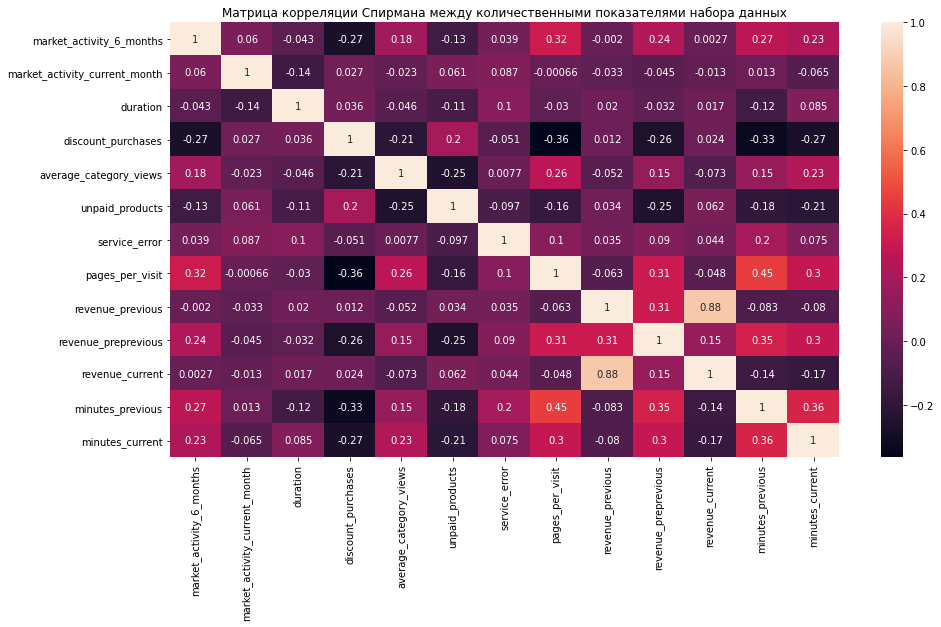

In [43]:
# построение матрицы корреляции и поиск сильных взаимосвязей
plt.figure(figsize=(15, 8))
sns.heatmap(data.iloc[:, 1:].select_dtypes(include = 'number').corr(method = 'spearman'), annot = True)
plt.title('Матрица корреляции Спирмана между количественными показателями набора данных', fontsize = 12)
plt.show()

**Вывод по промежуточному этапу:**

Заметна высокая линейная взаимосвязь между показателями **revenue_current** и **revenue_previous** - данные являются взаимосвязанными во времени (траты текущего месяца зависят от предыдущего).

Можно объединить данные и сформировать новый показатель - **revenue_total**

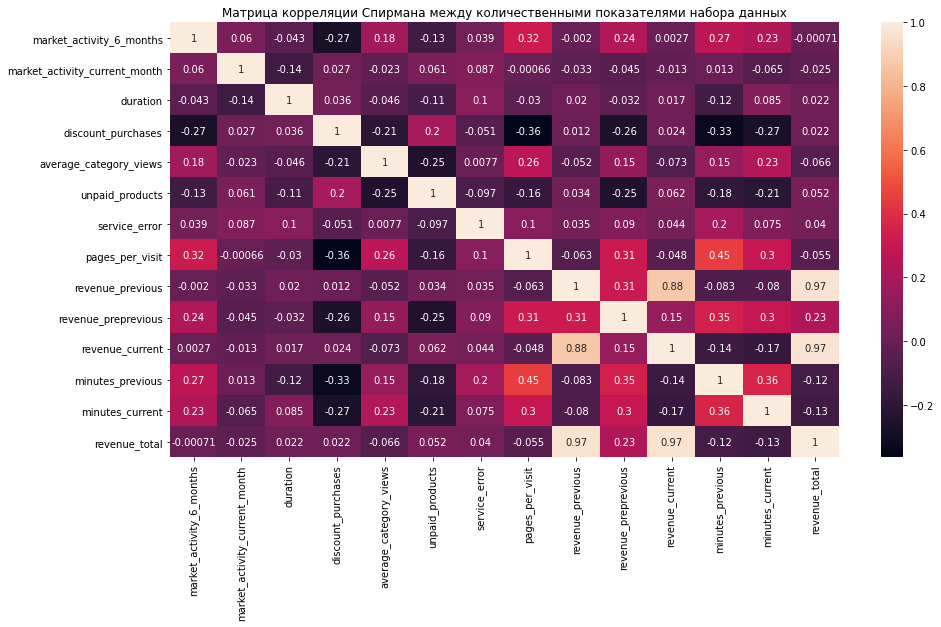

In [44]:
# инициализация нового признака 'revenue_total'
data['revenue_total'] = data['revenue_current'] + data['revenue_previous']

# повторное построение матрицы корреляции
plt.figure(figsize=(15, 8))
sns.heatmap(data.iloc[:, 1:].select_dtypes(include = 'number').corr(method = 'spearman'), annot = True)
plt.title('Матрица корреляции Спирмана между количественными показателями набора данных', fontsize = 12)
plt.show()

In [45]:
# исключение из набора данных столбцов с показателями текущей и предыдущей выручки
data = data.drop(['revenue_previous', 'revenue_current'], axis = 1)

**Вывод:**

1. Построены матрицы корреляции Спирмана между признаками набора данных и целевой переменной;
2. Обнаружена высокая взаимосвязь между признаками **revenue_current**, **revenue_previous** - показатели выручки в текущем и предыдущем периодах являются взаимосвязанными во времени;
3. Добавлен новый признак **revenue_total** - сумма **revenue_previous** и **revenue_current**;
4. Исключение из набора данных признаков **revenue_previous** и **revenue_current**;
5. Набор подготовлен к далльнейшему использованию в алгоритмах моделей машинного обучения.

## Построение моделей классификации данных <a class = 'anchor' id = 'Моделирование'></a>

### Подготовка данных и построение пайплайна МО <a class = 'anchor' id = 'Моделирование_Пайплайн'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Отбор категориальных и количественных значений в отдельные переменные - инициализация переменных **cat_cols** и **num_cols** соответственно;
2. Разделение исходного набора на область признаков и вектор целевой переменной - инициализация переменных **X** и **y** соответственно;
3. Формирование обучающей и тестовой выборок в соотношении **75:25** - инициализация переменных **X_train**, **X_test**, **y_train**, **y_test**;
4. Инициализация переменной **label_encoder** для хранения объекта кодировщика вектора целевой переменной. Кодирование значений переменных **y_train** и **y_test**;
5. Формирование пайплайна обработки данных и обучения моделей классификации данных;
6. Инициализация переменной **param_distributions** для хранения моделей и их гиперпараметров для последующего выбора лучшей;
7. Формирование вывода по итогам данного этапа.

In [46]:
# формирование области признаков и вектора целевой переменной
X = data.drop(['buyer_activity', 'user_id'], axis = 1)
y = data['buyer_activity']

In [47]:
# формирование категориального столбца 'discount_category'
X['discount_category'] = X['discount_purchases'].apply(lambda x: 'частые_покупки' if x >= 0.6 else 'редкие_покупки')

X = X.drop('discount_purchases', axis = 1)

In [48]:
# отбор категориальных и количественных признаков
ohe_cols = ['allow_notifications', 'popular_category', 'service_type']
ord_cols = ['discount_category']
num_cols = list(X.select_dtypes(include = 'number').columns)

In [49]:
# формирование обучающей и тестовой выборок

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = RANDOM_STATE,
    test_size = TEST_SIZE,
    stratify = y
)

In [50]:
# проверка размерности получившихся наборов
if X_train.shape[1] == X_test.shape[1]:
    print(f'Количество столбцов {X_train.shape[1]}. Потери признаков при разделении исходного набора не произошло')
else:
    print(f'Произведено неверное разделение данных. Зафиксирована утечка признаков')
    
if round(X_test.shape[0] / X.shape[0], 2) == 0.25:
    print(f'Соотношение размера тестовой выборки к исходному набору - 0.25. Соблюдено верное соотношение разделения данных')
else:
    print(f'Произведено неверное разделение данных. Зафиксирована утечка строк')

Количество столбцов 15. Потери признаков при разделении исходного набора не произошло
Соотношение размера тестовой выборки к исходному набору - 0.25. Соблюдено верное соотношение разделения данных


In [51]:
# кодирование целевого признака
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [52]:
# формирование пайплайна кодирования данных
ohe_pipeline = Pipeline(
    [
        ('simpleImputer_ohe',
         SimpleImputer(missing_values = np.nan,
                       strategy = 'most_frequent')),
        ('ohe',
         OneHotEncoder(drop = 'first',
                       sparse_output = False,
                       handle_unknown = 'ignore'))               
    ]
)

ord_pipeline = Pipeline(
    [
        (
            'simple_imputer_ord_before',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(categories=[
                                      ['частые_покупки','редкие_покупки']],
                          handle_unknown='use_encoded_value',
                          unknown_value=np.nan)
        ),
        (
            'simple_imputer_ord_after',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [53]:
# формирования пайплайна подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipeline, ohe_cols),
        ('ord', ord_pipeline, ord_cols),
        ('num', StandardScaler(), num_cols)
    ],
    remainder = 'passthrough'
)

In [54]:
# формирование пайплайна подготовки данных и обучения модели - используется модель DecisionTreeClassifier
final_pipeline = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state = RANDOM_STATE))
    ]
)

In [55]:
# инициализация переменной 'param_grid' для поиска оптимальной модели
param_grid = {
    'preprocessor__num' : [StandardScaler(), MinMaxScaler(), 'passthrough'],
    'models' : [DecisionTreeClassifier(random_state = RANDOM_STATE),
                KNeighborsClassifier(),
                SVC(random_state = RANDOM_STATE),
                LogisticRegression(random_state = RANDOM_STATE)]
}

In [56]:
# инициализация переменной 'param_distributions' для хранения распределения значений гиперпараметров
param_distributions = [
    {
        'models' : [KNeighborsClassifier()],
        'models__n_neighbors' : range(1, 20),
        'preprocessor__num' : [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models' : [DecisionTreeClassifier(random_state = RANDOM_STATE)],
        'models__max_depth' : range(2, 11),
        'models__min_samples_split' : range(2, 6),
        'models__min_samples_leaf' : range(2, 6),
        'preprocessor__num' : [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models' : [SVC(random_state = RANDOM_STATE, probability = True)],
        'preprocessor__num' : [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models' : [LogisticRegression(random_state = RANDOM_STATE)],
        'preprocessor__num' : [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

**Вывод:**

1. Проведен отбор категориальных и количественных значений в отдельные переменные - инициализированы переменные **cat_cols** и **num_cols** соответственно;
2. Проведено разделение исходного набора на область признаков и вектор целевой переменной - инициализированы переменные **X** и **y** соответственно;
3. Формирование обучающей и тестовой выборок в соотношении **75:25** - инициализация переменных **X_train**, **X_test**, **y_train**, **y_test**;
4. Инициализирована переменная **label_encoder** для хранения объекта кодировщика вектора целевой переменной. Кодирование значений переменных **y_train** и **y_test**;
5. Проведено формирование пайплайна обработки данных и обучения моделей классификации данных. Инициализирована переменная **final_pipeline**;
6. Инициализирована переменная **param_distributions** для хранения моделей и их гиперпараметров для последующего выбора лучшей.

### Выбор оптимальной модели <a class = 'anchor' id = 'Моделирование_выбор'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Выбор оптимальной модели из набора БЕЗ перебора параметров и поиском по сетке - **GridSearchCV**. Вывод на экран наименования лучшей модели и значения метрики качества;
2. Выбор оптимальной модели из набора С перебором параметров и поиском по сетке - **GridSearchCV**. Вывод на экран наименования лучшей модели и значения метрики качества;
3. Построение матрицы ошибок для оценки эффективности модели;
4. Формирование вывода по итогам данного этапа.

#### Без перебора гиперпараметров <a class = 'anchor' id = 'Моделирование_безПараметров'></a>

In [57]:
grid_withoutParams = GridSearchCV(
    final_pipeline,
    param_grid = param_grid,
    cv = 5,
    scoring = 'roc_auc',
    n_jobs = -1
)

# обучение модели на тренировочном наборе
grid_withoutParams.fit(X_train, y_train)

# вывод лучшей модели на экран
print('Лучшая модель классификации и ее параметры')
print(grid_withoutParams.best_params_)
print()
print('Метрика ROC_AUC для лучшей модели')
print(round(grid_withoutParams.best_score_, 2))

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Лучшая модель классификации и ее параметры
{'models': SVC(random_state=42), 'preprocessor__num': StandardScaler()}

Метрика ROC_AUC для лучшей модели
0.91


#### С перебором гиперпараметров <a class = 'anchor' id = 'Моделирование_сПараметрами'></a>

In [58]:
grid_withParams = GridSearchCV(
    final_pipeline,
    param_grid = param_distributions,
    cv = 5,
    scoring = 'roc_auc',
    n_jobs = -1
)

# обучение модели на тренировочном наборе
grid_withParams.fit(X_train, y_train)

# вывод лучшей модели на экран
print('Лучшая модель классификации и ее параметры')
print(grid_withParams.best_params_)
print()
print('Метрика ROC_AUC для лучшей модели')
print(round(grid_withParams.best_score_, 2))

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Лучшая модель классификации и ее параметры
{'models': SVC(probability=True, random_state=42), 'preprocessor__num': StandardScaler()}

Метрика ROC_AUC для лучшей модели
0.91


In [59]:
# проверка качества модели на тестовой выборке
y_pred = grid_withParams.predict_proba(X_test)
print('Метрика ROC_AUC для лучшей модели на ТЕСТОВОЙ выборке:', round(roc_auc_score(y_test, y_pred[:, 1]), 2))

Метрика ROC_AUC для лучшей модели на ТЕСТОВОЙ выборке: 0.92


Метрика Precision для результатов модели SVC: 0.95
Метрика Recall для результатов модели SVC: 0.77


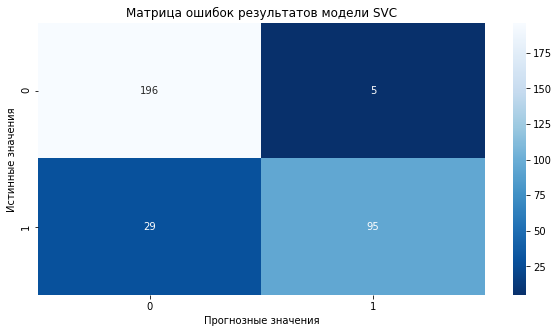

In [60]:
# построение матрицы ошибок
cm = confusion_matrix(y_test, grid_withParams.predict(X_test))

print('Метрика Precision для результатов модели SVC:', round(precision_score(y_test, grid_withParams.predict(X_test)),2 ))
print('Метрика Recall для результатов модели SVC:', round(recall_score(y_test, grid_withParams.predict(X_test)),2 ))


sns.heatmap(cm, annot = True, fmt= 'd', cmap = 'Blues_r')
plt.ylabel('Истинные значения')
plt.xlabel('Прогнозные значения')
plt.title('Матрица ошибок результатов модели SVC')
plt.show()

**Вывод по промежуточному этапу**

Модель отлично сработала на выявлении значений True Positive и False Positive - об этом свидетельствует метрика Precision.

Однако показатели по Recall несколько меньше - модель присвоила достаточно много значений False Negative: **модель говорит, что активность пользователя не изменилась, хотя на самом деле она снижается**.

Необходимо посмотреть на показатели метрики F1_score - найдем средневзвешенную оценку и при вычислении отдадим преимущество Recall.

In [61]:
# вычисление метрики f1_score с вниманием к значению Recall
print('Метрика Fbeta_score для результатов модели SVC:', round(fbeta_score(y_test, grid_withParams.predict(X_test), beta = 1.5), 2))

Метрика Fbeta_score для результатов модели SVC: 0.81


**Вывод по промежуточному этапу**

После введения единого показателя можно сказать, что модель отработала **хорошо**. Даже с учетом того, что внимание сместилось на показатель **Recall** итоговый результат позволяет принять модель с текущими параметрами на "вооружение".

**Вывод**

1. Произведен выбор оптимальной модели из набора БЕЗ перебора параметров и поиском по сетке - **GridSearchCV**. Лучшая модель и ее параметры:
    * **SVC**;
    * **random_state = 42**;
    * **Механизм масштабирования количественных значений - StandardScaler()**.
2. Произведен выбор оптимальной модели из набора С перебором параметров и поиском по сетке - **GridSearchCV**. Лучшая модель и ее параметры:
    * **SVC**;
    * **probability = True**;
    * **random_state = 42**;
    * **Механизм масштабирования количественных значений - StandardScaler()**.
3. Построена матрица ошибок для оценки эффективности модели:
    * Значения TP - 95;
    * Значения TN - 196;
    * Значения FP - 5;
    * Значения FN - 29;
    * Всего значений в выборке - 325.
4. Произведена оценка качества работы модели SVC на тестовой выборке:
    * Precision - 0.95;
    * Recall - 0.77;
    * FBeta_score - 0.81

**Данная модель с установленными параметрами подходит для дальнейшего использования в последуюшей классификации клиентов магазина.**

### Анализ важности признаков в работе модели <a class = 'anchor' id = 'Моделирование_анализПризнаков'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Кодирование / масштабирование значений исходной обучающей выборки - инициализация переменной **X_enc**;
2. Обучение лучшей модели на наборе **X_enc** и сохранение в отдельную переменную **best_estim**;
3. Поиск и визуализация степени влияния признаков на результаты работы модели - использование библиотеки **SHAP**;
4. Формирование вывода по итогам данного этапа.

/tmp/ipykernel_381/4180884684.py:10: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(X_enc, plot_type='bar', feature_names=labels_1)


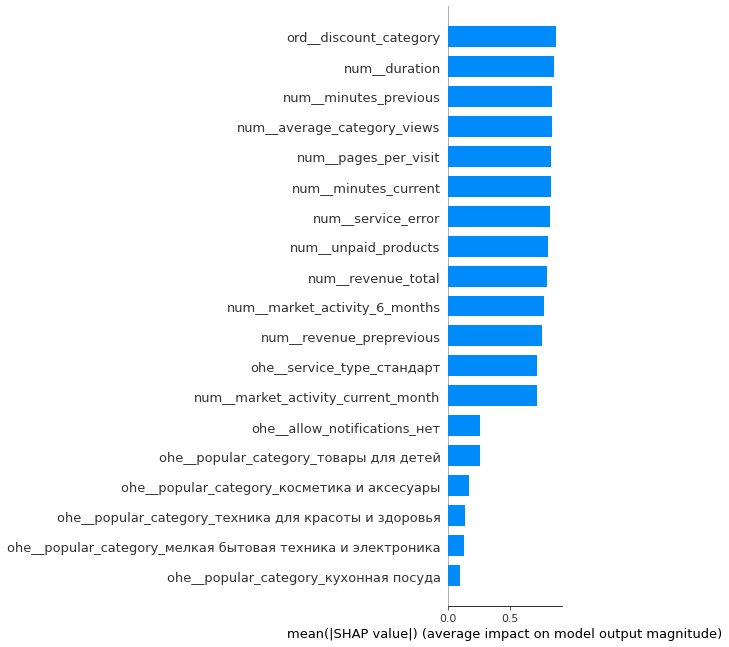

In [62]:
# поиск и визуализация степени влияния признаков
X_enc = grid_withParams.best_estimator_['preprocessor'].fit_transform(X_train)

best_estim = grid_withParams.best_estimator_['models'].fit(X_enc, y_train)
explainer_1 = shap.PermutationExplainer(best_estim, X_enc)


labels_1 = grid_withParams.best_estimator_[:-1].get_feature_names_out()

shap.summary_plot(X_enc, plot_type='bar', feature_names=labels_1) 

**Вывод**

1. Проведено кодирование / масштабирование значений исходной обучающей выборки - инициализирована переменная **X_enc**;
2. Обучена лучшая модели на наборе **X_enc** и сохранена в отдельную переменную **best_estim**;
3. Проведен поиск и визуализация степени влияния признаков на результаты работы модели - использована библиотека **SHAP**.

Менее всего на значение целевой переменной оказывают влияние признаки:
    * **popular_category** - популярная категория товаров;
    * **allow_notifications** - разрешить уведомления.

Остальные признаки имеют примерно схожую степень влияния - они могут быть использованы для дальнейшей сегментации пользователей. 

### Сегментация пользователей <a class = 'anchor' id = 'Моделирование_сегментация'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Инициализация нового столбца в тестовом наборе - **X_test** - вероятность принадлежности к классу 1, **probability**;
2. Построение диаграмм рассеяния в зависимости от выбранного количественного показателя и вероятности принадлежности к классу 1;
3. Сегментация пользователей - описание основных деталей, характеризующих пользователей со сниженной покупательской активностью;
4. Построение гистограмм распределения количественных величин для отобранных пользователей;
5. Построение диграмм для качественных показателей для отобранных пользователей;
6. Формирование вывода по итогам данного этапа.

In [63]:
# инициализация столбца 'probability'
X_test['probability'] = np.round(y_pred[:, 1], 2)
data = X_test.copy()

data.sort_values(by = 'probability', ascending = False)

,service_type,allow_notifications,market_activity_6_months,market_activity_current_month,duration,popular_category,average_category_views,unpaid_products,service_error,pages_per_visit,revenue_preprevious,minutes_previous,minutes_current,revenue_total,discount_category,probability
60,премиум,да,1.4,4,857,кухонная посуда,3,4,5,5,4465.0,6,12,10757.5,частые_покупки,1.00
300,стандарт,да,4.6,4,718,товары для детей,1,5,5,3,4503.0,9,9,10842.6,редкие_покупки,1.00
293,премиум,да,3.8,4,962,косметика и аксесуары,2,2,2,5,4419.0,7,7,10312.0,редкие_покупки,1.00
77,премиум,да,2.7,4,829,косметика и аксесуары,3,5,4,5,4648.0,10,7,11554.2,редкие_покупки,1.00
368,стандарт,да,4.8,4,507,косметика и аксесуары,2,0,4,3,4738.0,8,8,12912.7,частые_покупки,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,стандарт,нет,4.2,4,964,техника для красоты и здоровья,4,0,6,6,4981.0,12,21,9387.5,редкие_покупки,0.02
1131,стандарт,да,5.3,4,454,мелкая бытовая техника и электроника,6,3,3,7,4649.0,16,20,9152.8,редкие_покупки,0.02
488,премиум,да,4.9,3,888,техника для красоты и здоровья,3,1,6,9,5268.0,15,18,9591.0,редкие_покупки,0.02
698,премиум,да,3.9,4,572,мелкая бытовая техника и электроника,4,2,2,6,5194.0,16,18,11958.5,редкие_покупки,0.02


In [64]:
# инициализация пользовательской функции построения диаграмм рассеяния
def scatter_plotting(df : pd.DataFrame, x_value : str, y_value : str, title : str) -> None:
    plt.figure(figsize = (10, 4))
    sns.scatterplot(data = df, x = x_value, y = y_value, alpha=0.6)
    plt.title(title)
    plt.xlabel(x_value)
    plt.ylabel(y_value)
    plt.show()

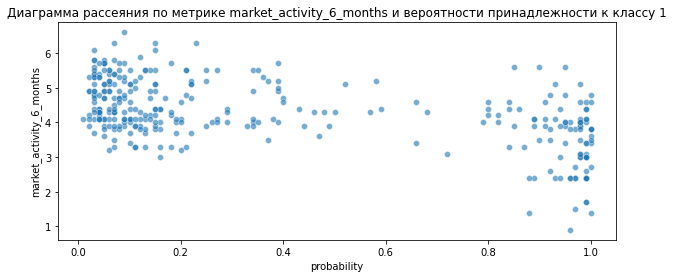

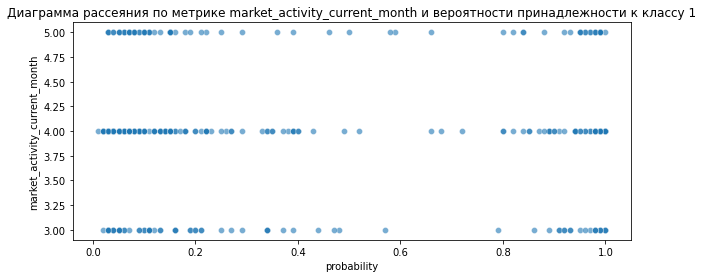

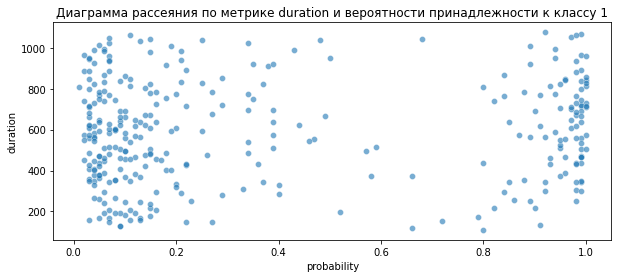

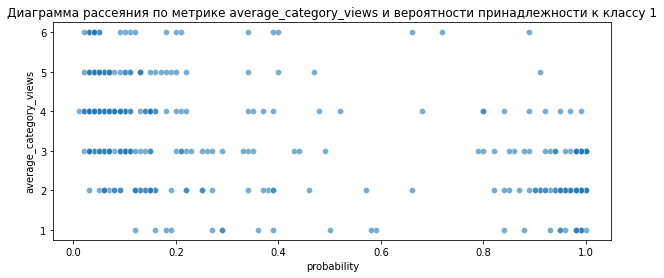

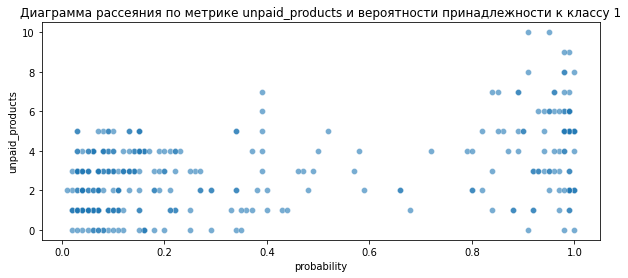

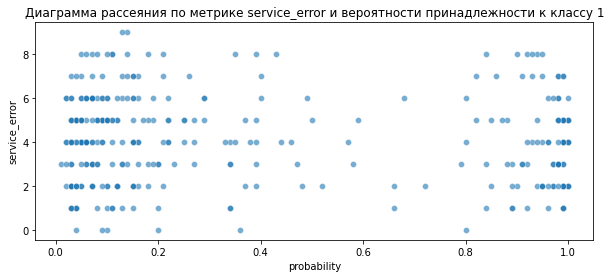

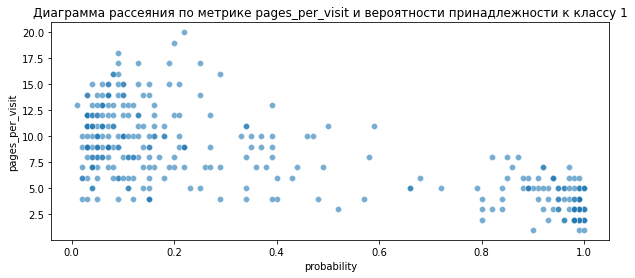

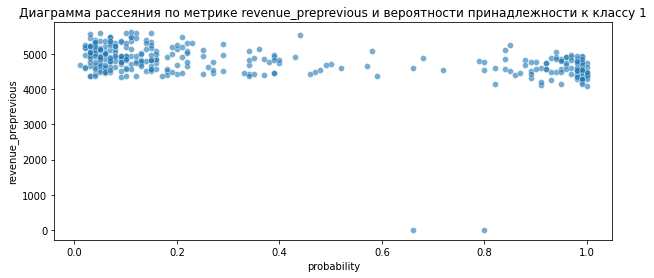

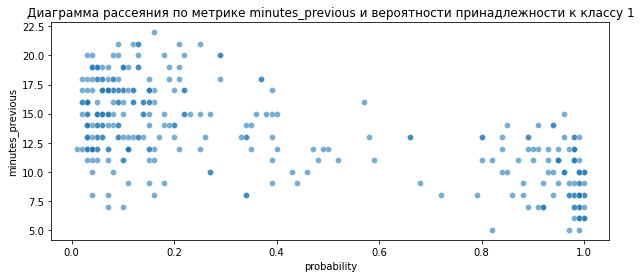

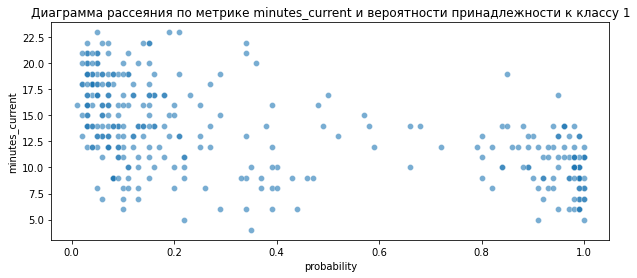

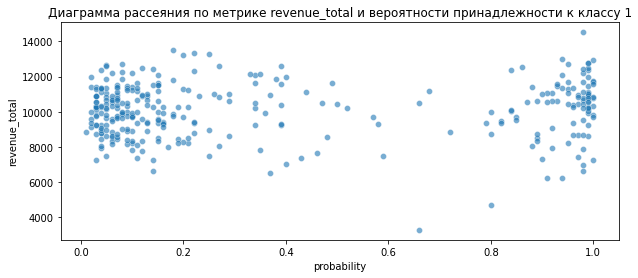

In [65]:
for col in num_cols:
    scatter_plotting(data, 'probability', col,  f'Диаграмма рассеяния по метрике {col} и вероятности принадлежности к классу 1')

**Вывод по промежуточному этапу**

На основании построенной визуализации можно выделить следующие паттерны в количественных показателях, которые характеризуют пользователей со сниженной активностью:

* **market_activity_6 months** - менее 4 месяцев;
* **discount_purchases** - наблюдаются 2 группы:
    * у пользователей снижается активность, и они **имеют низкие доли акциоанных покупок**;
    * у пользователей снижается активность, и они **совершают только покупки по акции** (> 0.6). Эта группа более показательна. Можно сказать, что данные пользователи заходят на ресурс только при наличии выгодных предложений. Покупки вне акционных периодов их не интересуют.
* **average_category_views** - менее 3;
* **pages_per_visit** - менее 7;
* **minutes_previous** и **minutes_current** - менее 13;
* **revenue_total** - более 10 000.

Далее можно выделить пользователей, которые в большей степени совершают акционные покупки по той причине, что есть явная взаимосвязь данной группой с потенциальным снижением покупательской активности на платформе.

In [66]:
# отбор пользователей, совершающих акционные покупки - инициализация переменной 'discount_users'
discount_users = data.copy().query('discount_category == "частые_покупки"')

In [67]:
# количественные показатели набора данных с пользователями, совершающими акционные покупки - инициализация переменной 'num_cols_du'
num_cols_du = list(discount_users.select_dtypes(include = 'number').columns)

# качественные показатели
cat_cols_du = list(discount_users.select_dtypes(exclude = 'number').columns)

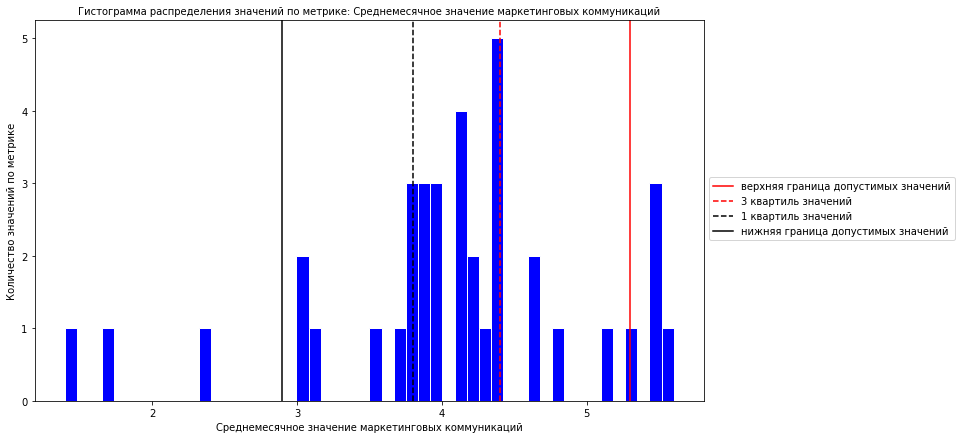

Верхняя допустимая граница значений: 5.300000000000001
Нижняя допустимая граница значений: 2.899999999999999
Медианное значение: 4.1
Среднее значение: 4.07
Доля значений, выходящих за верхнюю границу: 10.53%
Доля значений, выходящих за нижнюю границу: 7.89%


In [68]:
histogram_plotting(discount_users, 'market_activity_6_months', 50, 12, 7, 'Среднемесячное значение маркетинговых коммуникаций')

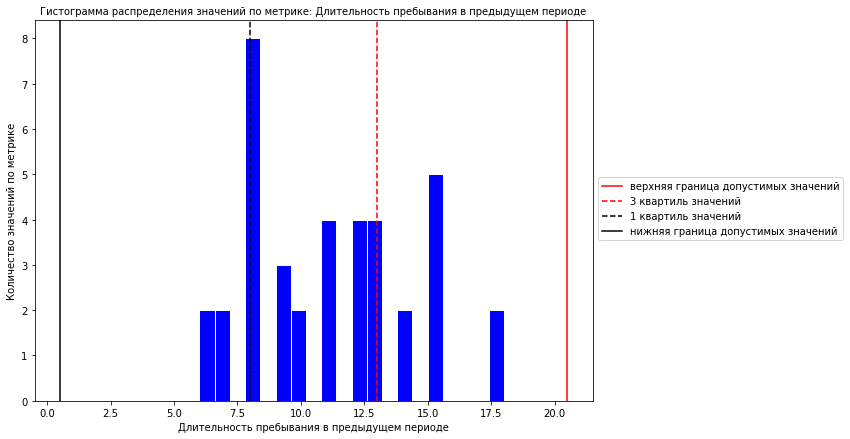

Верхняя допустимая граница значений: 20.5
Нижняя допустимая граница значений: 0.5
Медианное значение: 11.0
Среднее значение: 11.05
Доля значений, выходящих за верхнюю границу: 0.00%
Доля значений, выходящих за нижнюю границу: 0.00%


In [69]:
histogram_plotting(discount_users, 'minutes_previous', 20, 10, 7, 'Длительность пребывания в предыдущем периоде')

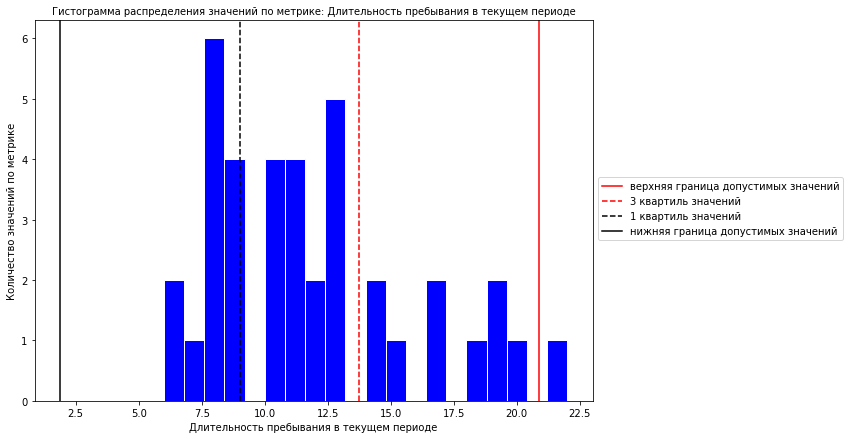

Верхняя допустимая граница значений: 20.875
Нижняя допустимая граница значений: 1.875
Медианное значение: 11.0
Среднее значение: 11.87
Доля значений, выходящих за верхнюю границу: 2.63%
Доля значений, выходящих за нижнюю границу: 0.00%


In [70]:
histogram_plotting(discount_users, 'minutes_current', 20, 10, 7, 'Длительность пребывания в текущем периоде')

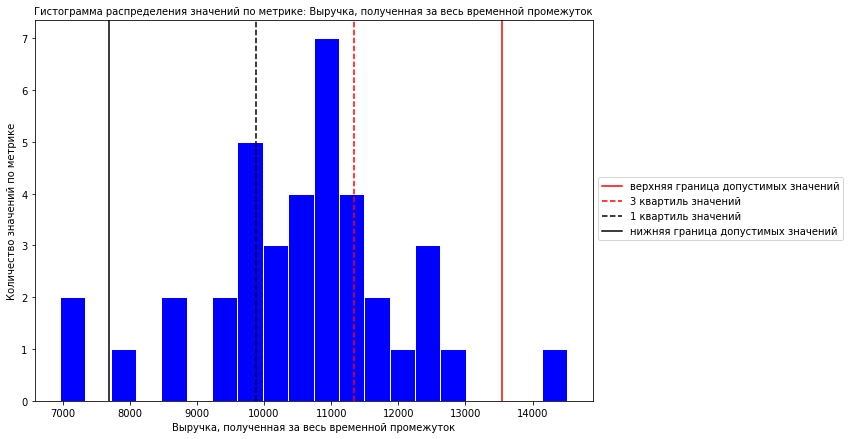

Верхняя допустимая граница значений: 13541.9375
Нижняя допустимая граница значений: 7690.837500000001
Медианное значение: 10681.5
Среднее значение: 10578.85
Доля значений, выходящих за верхнюю границу: 2.63%
Доля значений, выходящих за нижнюю границу: 5.26%


In [71]:
histogram_plotting(discount_users, 'revenue_total', 20, 10, 7, 'Выручка, полученная за весь временной промежуток')

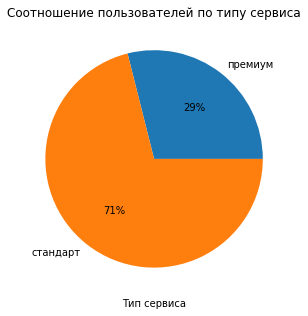

,count_of_users,share_of_users
стандарт,924,71.08
премиум,376,28.92


In [72]:
display_info(market_file, 'service_type', 'Соотношение пользователей по типу сервиса', 'Тип сервиса', 'pie')

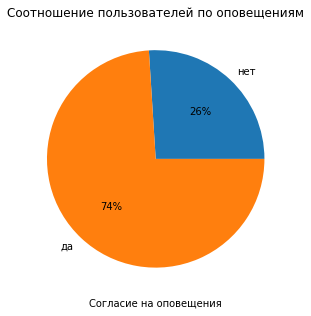

,count_of_users,share_of_users
да,962,74.0
нет,338,26.0


In [73]:
display_info(market_file, 'allow_notifications', 'Соотношение пользователей по оповещениям', 'Согласие на оповещения', 'pie')

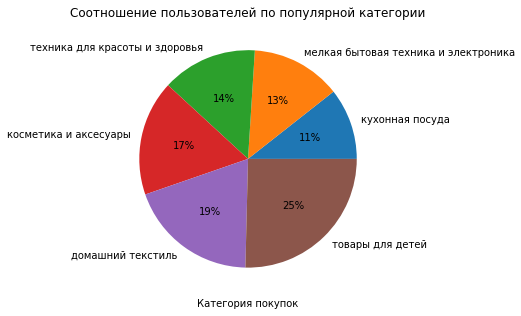

,count_of_users,share_of_users
товары для детей,330,25.38
домашний текстиль,251,19.31
косметика и аксесуары,223,17.15
техника для красоты и здоровья,184,14.15
мелкая бытовая техника и электроника,174,13.38
кухонная посуда,138,10.62


In [74]:
display_info(market_file, 'popular_category', 'Соотношение пользователей по популярной категории', 'Категория покупок', 'pie')

**Вывод по промежуточному этапу**

Можно отметить следующие отличительные особенности пользователей, совершающих покупки по акции:
* Эти пользователи точно знаю, чего хотят - **количество просмотренных страниц и изученных категорий обычно составляет 2 или 3**;
* В большинстве своем эти пользователи подписаны на рассылку оповещений - **как только появляется новость об акционных товаров, они переходят на сайт магазина**;
* Основные категории трат пользователей - **это детские товары и домашний текстиль**;
* Тип сервиса у таких пользователей - **стандарт**;

**Вывод**

1. Инициализирован новый столбец в тестовом наборе - **X_test** - вероятность принадлежности к классу 1, **probability**;
2. Построены диаграммы рассеяния в зависимости от выбранного количественного показателя и вероятности принадлежности к классу 1;
3. Произведена сегментация пользователей:

На основании построенной визуализации можно выделить следующие паттерны в количественных показателях, которые характеризуют пользователей со сниженной активностью:

* **market_activity_6 months** - менее 4 месяцев;
* **discount_purchases** - наблюдаются 2 группы:
    * у пользователей снижается активность, и они **имеют низкие доли акциоанных покупок**;
    * у пользователей снижается активность, и они **совершают только покупки по акции** (> 0.6). Эта группа более показательна. Можно сказать, что данные пользователи заходят на ресурс только при наличии выгодных предложений. Покупки вне акционных периодов их не интересуют.
* **average_category_views** - менее 3;
* **pages_per_visit** - менее 7;
* **minutes_previous** и **minutes_current** - менее 13;
* **revenue_total** - более 10 000.
4. Построены гистограммы распределения количественных величин для отобранных пользователей;
5. Построениы диграмм для качественных показателей для отобранных пользователей:
    
Можно отметить следующие отличительные особенности пользователей, совершающих покупки по акции:
* Эти пользователи точно знаю, чего хотят - **количество просмотренных страниц и изученных категорий обычно составляет 2 или 3**;
* В большинстве своем эти пользователи подписаны на рассылку оповещений - **как только появляется новость об акционных товаров, они переходят на сайт магазина**;
* Основные категории трат пользователей - **это детские товары и домашний текстиль**;
* Тип сервиса у таких пользователей - **стандарт**;

Для предотвращения снижения покупательской активности у выделенной когорты пользователей можно предпринять следующие действия:
1. Предложить промокоды на переход в "премиумный" сервис. В таком ключе удастся поддержать стабильные траты пользователей: предлагаемые товары в категориях будут идти со скидкой, а сам пользователь будет так же платить за подписку. При сведении итогового баланса в плюсе окажется магазин;
2. Предлагать увеличенную скидку на покупку комплекта. Помимо покупки товара из категории можно предложить пользователям купить что-то смежное, что дополнит первоначальную покупку;
3. Сформировать систему рекомендаций товаров, чтобы пользователи, перешедшие по ссылке на сайт магазина, видели на стартовой странице другие товары со скидкой, которые могут потенциально им подойти.

## Общий вывод <a class = 'anchor' id = 'Вывод'></a>

**Вывод**

1. Импортированы библиотеки Python:
    * для манипулирования данными:
        * pandas;
        * numpy.
    * для визуализации данных:
        * matplotlib.pyplot;
        * seaborn.
    * для решения задач машинного обучения:
        * LogisticRegression - модель логистической регрессии;
        * KNeighborsClassifier - модель k-ближайших соседей;
        * SVC - машина опорных векторов;
        * DecisionTreeClassifier - модель дерева принятия решений;
        * метрики оценки эффективности моделей классификации;
        * train_test_split - механизм разделения данных;
        * GridSearchCV - механизм поиска гиперпараметров с перебором по "сетке";
        * StandardScaler - стандартизация данных;
        * MinMaxScaler - нормализация данных;
        * OneHotEncoder - one-hot кодирование категориальных признаков;
        * LabelEncoder - кодирование значений целевой переменной;
        * Pipeline - механизм построения пайплайнов;
        * ColumnTransformer - механизм объединения шагов пайплайна;
        * SimpleImputer - механизм заполнения пустых значений;
        * SHAP - механизм анализа важности признаков.
2. Произведена загрузка данных в рабочую среду Jupyter Notebook. Инициализированы переменные в соответствие с названиями загружаемых датасетов:
    * `market_file`;
    * `market_money`;
    * `market_time`;
    * `money`;
3. Выведены на экран параметры датасетов:
    * `market_file`
        * В наборе данных **отсутствуют пустые значения**;
        * Типы данных соответствуют сущностям значений, приведенным в столбцах;
        * Наблюдаются неверные написания значений категориальных признаков (на примере **"стандартт"** в столбце **Тип сервиса**). Требуется проверка набора данных на неявные дубликаты.
    * `market_money`
        * В наборе данных **отсутствуют пустые значения**;
        * Типы данных соответствуют сущностям значений, приведенным в столбцах.
    * `market_time`
        * В наборе данных **отсутствуют пустые значения**;
        * Типы данных соответствуют сущностям значений, приведенным в столбцах;
        * Наблюдаются неверные написания значений категориальных признаков (на примере **"предыдцщий_месяц"** в столбце **Период**). Требуется проверка набора данных на неявные дубликаты.
    * `money`
        * Произведена обработка числовых значений в столбце **Прибыль** - изменено форматирование дробной части. Тип данных - float;
        * В наборе данных **отсутствуют пустые значения**.
4. Выполнена замена названий столбцов в датасетах:
    * Названия переведены на английский язык;
    * Названия приведены к формату snake_case.
5. Выполнена проверка наборов данных на дубликаты:
    * **Явные дубликаты** - явные дубликаты **не обнаружены**; 
    * Неявные дубликаты:
        * Столбец **service_type** в наборе `market_file` - преобразованы значения "стандартт" на "стандарт";
        * Столбец **period** в наборе `market_time` - преобразованы значения "предыдцщий_месяц" на "предыдущий_месяц";
6. Выведена на экран основная статистическая информация по текущим версиям наборов данных:
    * Набор `market_file` характеризуется следующими статистическими показателями:
        * **market_activity_6_months - среднемесячное значение маркетинговых коммуникаций на пользователя**:
            * Среднее значение - 4.3;
            * Минимальное значение - 0.9;
            * Максимальное значение - 6.6;
            * Стандартное отклонение - 1.1.
        * **market_activity_current_month - количество маркетинговых коммуникаций в текущем месяце**:
            * Среднее значение - 4.0;
            * Минимальное значение - 3.0;
            * Максимальное значение - 5.0;
            * Стандартное отклонение - 0.7. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
        * **duration - сколько времени прошло с момента регистрации пользователя на сайте**:
            * Среднее значение - 601.9;
            * Минимальное значение - 110;
            * Максимальное значение - 1 079;
            * Стандартное отклонение - 249,9. Ряд данных достаточно вариативен, но **явных выбросов пока не обнаружено**. Потребуется проверка на следующих шагах.
        * **discount_purchases - среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев**:
            * Среднее значение - 0.32;
            * Минимальное значение - 0.0;
            * Максимальное значение - 0.99;
            * Стандартное отклонение - 0.25. Заметно значение в 99% совершенных покупок по акции - скорее всего пользователь совершает покупки исключительно акционных товаров.
        * **average_category_views - показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца**:
            * Среднее значение - 3.3;
            * Минимальное значение - 1.0;
            * Максимальное значение - 6.0;
            * Стандартное отклонение - 1.4. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
        * **unpaid_products - общее число неоплаченных товаров в корзине за последние 3 месяца**:
            * Среднее значение - 2.8;
            * Минимальное значение - 0.0;
            * Максимальное значение - 10.0;
            * Стандартное отклонение - 2.0. Заметно большое максимальное значение в 10 неоплаченных единиц - вероятно, что это есть уникальный пользователь, который добавил в корзину большое значение товаров с целью последующей будущей покупки (корзина выполняет роль "Избранное").
        * **service_error - число сбоев, которые коснулись покупателя во время посещения сайта**:
            * Среднее значение - 4.2;
            * Минимальное значение - 0.0;
            * Максимальное значение - 9.0;
            * Стандартное отклонение - 2.0. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
        * **pages_per_visit - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца**:
            * Среднее значение - 8.2;
            * Минимальное значение - 1.0;
            * Максимальное значение - 20.0;
            * Стандартное отклонение - 4.0. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
    * Набор `market_money` характеризуется следующими статистическими показателями:
        * **revenue - сумма выручки за период**:
            * Среднее значение - 5 025.7;
            * Минимальное значение - 0.0;
            * Максимальное значение - 106 862.2;
            * Стандартное отклонение - 1 777.7. **Обнаружена аномально большая сумма выручки**. Потребуется проверка на следующих шагах и устранение аномалий.
    * Набор `market_time` характеризуется следующими статистическими показателями:
        * **minutes - время, проведенное на сайте, в минутах**:
            * Среднее значение - 13.3;
            * Минимальное значение - 4.0;
            * Максимальное значение - 23.0;
            * Стандартное отклонение - 4.0. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
    * Набор `money` характеризуется следующими статистическими показателями:
        * **profit - значение прибыли**:
            * Среднее значение - 4.0;
            * Минимальное значение - 0.86;
            * Максимальное значение - 7.43;
            * Стандартное отклонение - 1.0. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
7. Исследование соотношения количества значений качественных показателей
    * Набор `market_file` характеризуется следующими показателями:
        * Значения по признаку **buyer_activity** соотнесены не в равных пропорциях: 802 (62%) - 498 (32%);
        * Значения по признаку **service_type** соотнесены не в равных пропорциях: 924 (71%) - 376 (29%);
        * Значения по признаку **allow_notifications** соотнесены не в равных пропорциях: 962 (74%) - 338 (26%);
        * Значения по признаку **popular_category** распределены более равномерно, чем значения по остальным показателям. Диапазон варьируется от 138 до 330.
    * Набор `market_money` характеризуется следующими показателями:
        * Значения по признаку **period** соотнесены не в равных пропорциях: 2 600 (62%) - 1 300 (32%);
    * Набор `market_time` характеризуется следующими показателями:
        * Значения по признаку **period** соотнесены в равных пропорциях: 1 300 (50%) - 1 300 (50%);
8. Исследование распределения количественных показателей наборов. Построение **гистограмм распределения значений**:
    * Набор `market_file` характеризуется следующими показателями:
        * **market_activity_6_months** - среднемесячное значение маркетинговых коммуникаций
            * Распределение имеет вид **нормального**. Значения группируются около среднего **4.25** и медианы **4.2**;
            * Заметны как несколько объектов с большим количеством маркетинговых коммуникаций (>6), так и объекты с минимальным количеством коммуникаций (<2).
        * **duration** - длительность пребывания на сайте
            * Распределение имеет вид **нормального**. Значения группируются около среднего **601.9** и медианы **606**;
            * Аномально малых и высоких значений длительности посещения **не обнаружено**.
        * **discount_purchases** - доля акционных покупок
            * Заметно разделение пользователей на группы: основная масса покупателей и покупателей, совершающих покупки при наличии скидки;
            * Заметны так же отдельные объекты, поведение которых нельзя отнести ни к одной, ни к другой группам.
    * Набор `market_money` характеризуется следующими показателями:
        * **revenue** - сумма выручки:
            * Распределение имеет вид **отличного от нормального**. Значения группируются около медианы **4 600**. Среднее значение - **5 025**;
            * Замечено наличие аномально высоких значений - пользователи с суммой выручки более 100 000.
            * На этапе подготовки данных к машинному обучению потребуется произвести **нормирование данных**.
    * Набор `market_time` характеризуется следующими показателями:
        * **minutes** - время, проведенное на сайте, в минутах
            * Распределение имеет вид **близкого к нормальному**. Значения группируются около медианы **13**. Среднее значение - **13.3**;
            * Аномально высоких или малых значений **не обнаружено**.
    * Набор `money` характеризуется следующими показателями:
        * **profit** - значение прибыли
            * Распределение имеет вид **близкого к нормальному**. Значения группируются около медианы **4.045**. Среднее значение - **4.0**;
            * Имеются небольшие выбросы, но не влияющие на общий характер данных.
9. Произведена фильтрация наборов данных - **выбраны клиенты с покупательской активностью не менее 3 месяцев**. Исключены аномально большие значения из наборов данных;
10. Выполнен отбор значений в отдельные столбцы в зависимости от значения **period**:
    * `market_money` - параметр **revenue**;
    * `market_time` - параметр **minutes**.
11. Выполнено объединение датасетов `market_file`, `market_money` и `market_time` в единый набор - инициализирована переменная `data`:
    * Количество строк ДО объединения данных: 3897.
    * Количество строк ПОСЛЕ объединения данных 1299.
    * Изменение строк на -67.0%
    * Количество столбцов ДО объединения данных: 13.
    * Количество столбцов ПОСЛЕ объединения данных 18.
    * Изменение столбцов на 38.0%
12. Построены матрицы корреляции Пирсона между признаками набора данных и целевой переменной;
13. Обнаружена высокая взаимосвязь между признаками **revenue_current**, **revenue_previous** - показатели выручки в текущем и предыдущем периодах являются взаимосвязанными во времени;
14. Добавлен новый признак **revenue_total** - сумма **revenue_previous** и **revenue_current**;
15. Исключение из набора данных признаков **revenue_previous** и **revenue_current**;
16. Набор подготовлен к далльнейшему использованию в алгоритмах моделей машинного обучения;
17. Проведен отбор категориальных и количественных значений в отдельные переменные - инициализированы переменные **cat_cols** и **num_cols** соответственно;
18. Проведено разделение исходного набора на область признаков и вектор целевой переменной - инициализированы переменные **X** и **y** соответственно;
19. Формирование обучающей и тестовой выборок в соотношении **75:25** - инициализация переменных **X_train**, **X_test**, **y_train**, **y_test**;
20. Инициализирована переменная **label_encoder** для хранения объекта кодировщика вектора целевой переменной. Кодирование значений переменных **y_train** и **y_test**;
21. Проведено формирование пайплайна обработки данных и обучения моделей классификации данных. Инициализирована переменная **final_pipeline**;
22. Инициализирована переменная **param_distributions** для хранения моделей и их гиперпараметров для последующего выбора лучшей;
23. Произведен выбор оптимальной модели из набора БЕЗ перебора параметров и поиском по сетке - **GridSearchCV**. Лучшая модель и ее параметры:
    * **SVC**;
    * **random_state = 42**;
    * **Механизм масштабирования количественных значений - StandardScaler()**.
24. Произведен выбор оптимальной модели из набора С перебором параметров и поиском по сетке - **GridSearchCV**. Лучшая модель и ее параметры:
    * **SVC**;
    * **probability = True**;
    * **random_state = 42**;
    * **Механизм масштабирования количественных значений - StandardScaler()**.
25. Построена матрица ошибок для оценки эффективности модели:
    * Значения TP - 95;
    * Значения TN - 196;
    * Значения FP - 5;
    * Значения FN - 29;
    * Всего значений в выборке - 325.
26. Произведена оценка качества работы модели SVC на тестовой выборке:
    * Precision - 0.95;
    * Recall - 0.77;
    * FBeta_score - 0.81
27. Проведено кодирование / масштабирование значений исходной обучающей выборки - инициализирована переменная **X_enc**;
28. Обучена лучшая модели на наборе **X_enc** и сохранена в отдельную переменную **best_estim**;
29. Проведен поиск и визуализация степени влияния признаков на результаты работы модели - использована библиотека **SHAP**.

Менее всего на значение целевой переменной оказывают влияние признаки:
* **popular_category** - популярная категория товаров;
* **allow_notifications** - разрешить уведомления.

Остальные признаки имеют примерно схожую степень влияния - они могут быть использованы для дальнейшей сегментации пользователей. 

30. Инициализирован новый столбец в тестовом наборе - **X_test** - вероятность принадлежности к классу 1, **probability**;
31. Построены диаграммы рассеяния в зависимости от выбранного количественного показателя и вероятности принадлежности к классу 1;
32. Произведена сегментация пользователей:

На основании построенной визуализации можно выделить следующие паттерны в количественных показателях, которые характеризуют пользователей со сниженной активностью:

* **market_activity_6 months** - менее 4 месяцев;
* **discount_purchases** - наблюдаются 2 группы:
    * у пользователей снижается активность, и они **имеют низкие доли акциоанных покупок**;
    * у пользователей снижается активность, и они **совершают только покупки по акции** (> 0.6). Эта группа более показательна. Можно сказать, что данные пользователи заходят на ресурс только при наличии выгодных предложений. Покупки вне акционных периодов их не интересуют.
* **average_category_views** - менее 3;
* **pages_per_visit** - менее 7;
* **minutes_previous** и **minutes_current** - менее 13;
* **revenue_total** - более 10 000.
33. Построены гистограммы распределения количественных величин для отобранных пользователей;
34. Построениы диграмм для качественных показателей для отобранных пользователей:
    
Можно отметить следующие отличительные особенности пользователей, совершающих покупки по акции:
* Эти пользователи точно знаю, чего хотят - **количество просмотренных страниц и изученных категорий обычно составляет 2 или 3**;
* В большинстве своем эти пользователи подписаны на рассылку оповещений - **как только появляется новость об акционных товаров, они переходят на сайт магазина**;
* Основные категории трат пользователей - **это детские товары и домашний текстиль**;
* Тип сервиса у таких пользователей - **стандарт**;

Для предотвращения снижения покупательской активности у выделенной когорты пользователей можно предпринять следующие действия:
1. Предложить промокоды на переход в "премиумный" сервис. В таком ключе удастся поддержать стабильные траты пользователей: предлагаемые товары в категориях будут идти со скидкой, а сам пользователь будет так же платить за подписку. При сведении итогового баланса в плюсе окажется магазин;
2. Предлагать увеличенную скидку на покупку комплекта. Помимо покупки товара из категории можно предложить пользователям купить что-то смежное, что дополнит первоначальную покупку;
3. Сформировать систему рекомендаций товаров, чтобы пользователи, перешедшие по ссылке на сайт магазина, видели на стартовой странице другие товары со скидкой, которые могут потенциально им подойти.